###INSTALL DEAP

In [ ]:
pip install deap

     |████████████████████████████████| 163kB 5.5MB/s 


###IMPORT LIBRARY

In [ ]:
import math
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
import random


import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

!pip install ipython-autotime
%load_ext autotime

time: 602 µs


###IMPORT DEAP LIBRARY

In [ ]:
from deap import creator, base, tools, algorithms
from deap import tools

time: 10.9 ms


###IMPORT MACHINE LEARNING ALGORITHM SKLEARN

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#class imbalance
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.metrics import geometric_mean_score

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import auc

time: 416 ms


###IMPORT NASA PROMISE DATASET

In [ ]:
#mengimport google drive
from google.colab import drive
#memanggil dataset dari drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
time: 38.7 s


In [ ]:
#Import CM1 Dataset
data_cm1 = pd.read_csv('/content/gdrive/My Drive/DATASET/CM1.csv')
#Import JM1 Dataset
data_jm1 = pd.read_csv('/content/gdrive/My Drive/DATASET/JM1.csv')
indexNames = data_jm1[data_jm1['branchCount'] == '?'].index
data_jm1.drop(indexNames, inplace=True)
#Import KC1 Dataset
data_kc1 = pd.read_csv('/content/gdrive/My Drive/DATASET/KC1.csv')
#Import KC2 Dataset
data_kc2 = pd.read_csv('/content/gdrive/My Drive/DATASET/KC2.csv')
#Import KC3 Dataset
data_kc3 = pd.read_csv('/content/gdrive/My Drive/DATASET/KC3.csv')
#Import MC1 Dataset
data_mc1 = pd.read_csv('/content/gdrive/My Drive/DATASET/MC1.csv')
#Import MC2 Dataset
data_mc2 = pd.read_csv('/content/gdrive/My Drive/DATASET/MC2.csv')
#Import MW1 Dataset
data_mw1 = pd.read_csv('/content/gdrive/My Drive/DATASET/MW1.csv')
#Import PC1 Dataset
data_pc1 = pd.read_csv('/content/gdrive/My Drive/DATASET/PC1.csv')
#Import PC2 Dataset
data_pc2 = pd.read_csv('/content/gdrive/My Drive/DATASET/PC2.csv')
#Import PC3 Dataset
data_pc3 = pd.read_csv('/content/gdrive/My Drive/DATASET/PC3.csv')
#Import PC4 Dataset
data_pc4 = pd.read_csv('/content/gdrive/My Drive/DATASET/PC4.csv')

time: 4.72 s


In [ ]:
data_kc2

loc  v(g)  ev(g)  iv(g)  ...  total_Op  total_Opnd  branchCount  class
0     1.1   1.4    1.4    1.4  ...       1.2         1.2          1.4  False
1     3.0   1.0    1.0    1.0  ...       1.0         0.0          1.0  False
2    14.0   2.0    1.0    2.0  ...      13.0         9.0          3.0  False
3    10.0   2.0    1.0    2.0  ...      11.0         7.0          3.0  False
4     8.0   1.0    1.0    1.0  ...       5.0         5.0          1.0  False
..    ...   ...    ...    ...  ...       ...         ...          ...    ...
517   4.0   1.0    1.0    1.0  ...       4.0         1.0          1.0   True
518   4.0   1.0    1.0    1.0  ...       3.0         1.0          1.0   True
519   4.0   1.0    1.0    1.0  ...       3.0         1.0          1.0   True
520   4.0   1.0    1.0    1.0  ...       3.0         2.0          1.0   True
521   3.0   1.0    1.0    1.0  ...       1.0         0.0          1.0   True

[522 rows x 22 columns]

time: 62.4 ms


###MENENTUKAN LABEL DAN FITUR

In [ ]:
#CM1 DATASET
X_cm1 = data_cm1.drop(columns='class') #data fitur
y_cm1 = data_cm1['class'] #data target
#JM1 DATASET
X_jm1 = data_jm1.drop(columns='defects')
y_jm1 = data_jm1['defects']
#KC1 DATASET
X_kc1 = data_kc1.drop(columns='class') #data fitur
y_kc1 = data_kc1['class'] #data target
#KC2 DATASET
X_kc2 = data_kc2.drop(columns='class') #data fitur
y_kc2 = data_kc2['class'] #data target
#KC3 DATASET
X_kc3 = data_kc3.drop(columns='Defective')
y_kc3 = data_kc3['Defective']
#PC1 DATASET
X_pc1 = data_pc1.drop(columns='class') #data fitur
y_pc1 = data_pc1['class'] #data target
#PC2 DATASET
X_pc2 = data_pc2.drop(columns='Defective')
y_pc2 = data_pc2['Defective']
#PC3 DATASET
X_pc3 = data_pc3.drop(columns='Defective')
y_pc3 = data_pc3['Defective']
#PC4 DATASET
X_pc4 = data_pc4.drop(columns='c')
y_pc4 = data_pc4['c']

time: 25.3 ms


###TEST KOMBINASI FITUR

In [ ]:
#KC2 DATASET
X_kc2_1 = data_kc2[['lOComment']] #data fitur
X_kc2_2 = data_kc2[['lOComment','v(g)']] #data fitur
X_kc2_3 = data_kc2[['lOComment','v(g)','l']] #data fitur
X_kc2_4 = data_kc2[['lOComment','v(g)','l','i']] #data fitur
X_kc2_5 = data_kc2[['lOComment','v(g)','l','i','uniq_Op']] #data fitur

y_kc2 = data_cm1['class'] #data target

time: 12.3 ms


In [ ]:
scaler = MinMaxScaler()
X_kc2_1 = pd.DataFrame(scaler.fit_transform(X_kc2_1), index=X_kc2_1.index, columns=X_kc2_1.columns)
X_kc2_2 = pd.DataFrame(scaler.fit_transform(X_kc2_2), index=X_kc2_2.index, columns=X_kc2_2.columns)
X_kc2_3 = pd.DataFrame(scaler.fit_transform(X_kc2_3), index=X_kc2_3.index, columns=X_kc2_3.columns)
X_kc2_4 = pd.DataFrame(scaler.fit_transform(X_kc2_4), index=X_kc2_4.index, columns=X_kc2_4.columns)
X_kc2_5 = pd.DataFrame(scaler.fit_transform(X_kc2_5), index=X_kc2_5.index, columns=X_kc2_5.columns)

time: 18.5 ms


In [ ]:
def machinelearningfitur(X, y, model, name):
    #i = 0
    #for train_index, test_index in kfold.split(X):
        #print("-------------------------------------------------")
        #X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index].ravel(), y[test_index].ravel()
    estimator = BalancedBaggingClassifier(base_estimator=model, sampling_strategy='auto', replacement=False, random_state=42)

    cv_results = cross_validate(estimator, X, y, cv=kfold, scoring=['accuracy','roc_auc','recall','precision'])
    y_pred = cross_val_predict(estimator, X, y, cv=kfold)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    

    print('===========================')
    print(name)
    print('===========================')
    print ("AUC SKLEARN =", metrics.roc_auc_score(y, y_pred))
    print('AUC       = ', cv_results['test_roc_auc'].mean())
    print('ACCURACY  = ', cv_results['test_accuracy'].mean())
    print('Recall    = ', cv_results['test_recall'].mean())
    print('Precision = ', cv_results['test_precision'].mean())
    print('Nilai G-Means = {}'.format(geometric_mean_score(y,y_pred)))


    print('=============================')
    print('CONFISION MATRIX')
    print('=============================')
    print('TN :', tn)
    print('TP :', tp)
    print('FP :', fp)
    print('FN :', fn)

    print('=============================')
    print('PERHITUNGAN MANUAL')
    print('=============================')  
    performance(tn, tp, fp, fn)


    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(kfold.split(X, y)):
        model.fit(X.iloc[train], y.iloc[train])
        viz = plot_roc_curve(model, X.iloc[test], y.iloc[test],
                            name='ROC fold {}'.format(i),
                            alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="ROC AUC Plot Cross-validation")
    ax.legend(loc="lower right")
    plt.show()
        #i = i + 1
        #print('Fold', i)
        #performance(y_test, y_pred)

time: 68.2 ms


####SVM

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.7100551739668955
AUC       =  0.7556008058757943
ACCURACY  =  0.7818577648766327
Recall    =  0.6030615218115218
Precision =  0.4867456807897984
Nilai G-Means = 0.6996226885377976
CONFISION MATRIX
TN : 345
TP : 63
FP : 70
FN : 44
PERHITUNGAN MANUAL
ACCURACY =  0.7816091954022989
RECALL|SENSITIVITAS|TPrate =  0.5887850467289719
PRECISION =  0.47368421052631576
BALANCE =  0.6857159789240481
SPECIFICITY|TNrate =  0.8313253012048193
FPrate =  0.1686746987951807
AUC =  0.7100551739668957
G-MEANS =  0.6996226885377976


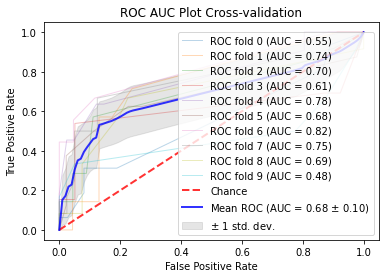

time: 1.33 s


In [ ]:
machinelearningfitur(X_kc2_1, y_kc2, SVC(), 'SUPPORT VECTOR MACHINE')

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.7323612205832677
AUC       =  0.8282433994093404
ACCURACY  =  0.7951741654571843
Recall    =  0.6322281884781884
Precision =  0.5059495161701044
Nilai G-Means = 0.7246212838127217
CONFISION MATRIX
TN : 348
TP : 67
FP : 67
FN : 40
PERHITUNGAN MANUAL
ACCURACY =  0.7950191570881227
RECALL|SENSITIVITAS|TPrate =  0.6261682242990654
PRECISION =  0.5
BALANCE =  0.7120634293676906
SPECIFICITY|TNrate =  0.8385542168674699
FPrate =  0.1614457831325301
AUC =  0.7323612205832677
G-MEANS =  0.7246212838127217


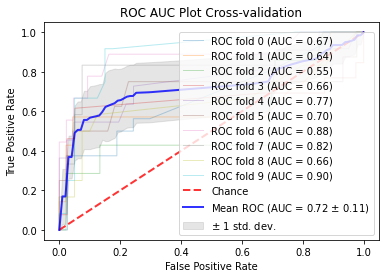

time: 1.3 s


In [ ]:
machinelearningfitur(X_kc2_2, y_kc2, SVC(), 'SUPPORT VECTOR MACHINE')

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.733599819840108
AUC       =  0.8188086515677535
ACCURACY  =  0.7531204644412192
Recall    =  0.7114940614940615
Precision =  0.45218643198906355
Nilai G-Means = 0.7328722110566025
CONFISION MATRIX
TN : 318
TP : 75
FP : 97
FN : 32
PERHITUNGAN MANUAL
ACCURACY =  0.7528735632183908
RECALL|SENSITIVITAS|TPrate =  0.7009345794392523
PRECISION =  0.436046511627907
BALANCE =  0.7316046313371474
SPECIFICITY|TNrate =  0.7662650602409639
FPrate =  0.23373493975903614
AUC =  0.7335998198401081
G-MEANS =  0.7328722110566025


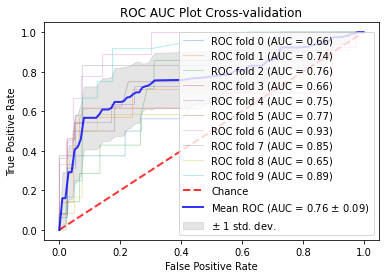

time: 1.42 s


In [ ]:
machinelearningfitur(X_kc2_3, y_kc2, SVC(), 'SUPPORT VECTOR MACHINE')

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.7673685395788763
AUC       =  0.8448211437193279
ACCURACY  =  0.7628447024673439
Recall    =  0.7953941891441891
Precision =  0.4602616836208167
Nilai G-Means = 0.7673233000039631
CONFISION MATRIX
TN : 315
TP : 83
FP : 100
FN : 24
PERHITUNGAN MANUAL
ACCURACY =  0.7624521072796935
RECALL|SENSITIVITAS|TPrate =  0.7757009345794392
PRECISION =  0.453551912568306
BALANCE =  0.7672193625231896
SPECIFICITY|TNrate =  0.7590361445783133
FPrate =  0.24096385542168675
AUC =  0.7673685395788763
G-MEANS =  0.7673233000039631


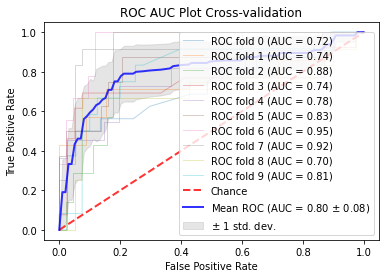

time: 1.32 s


In [ ]:
machinelearningfitur(X_kc2_4, y_kc2, SVC(), 'SUPPORT VECTOR MACHINE')

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.7804751717148969
AUC       =  0.8449610158034101
ACCURACY  =  0.7781204644412191
Recall    =  0.7977751415251416
Precision =  0.48333166317686443
Nilai G-Means = 0.7804617828745001
CONFISION MATRIX
TN : 322
TP : 84
FP : 93
FN : 23
PERHITUNGAN MANUAL
ACCURACY =  0.7777777777777778
RECALL|SENSITIVITAS|TPrate =  0.7850467289719626
PRECISION =  0.4745762711864407
BALANCE =  0.7804275760270462
SPECIFICITY|TNrate =  0.7759036144578313
FPrate =  0.22409638554216868
AUC =  0.780475171714897
G-MEANS =  0.7804617828745001


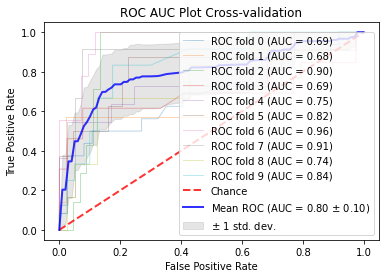

time: 1.36 s


In [ ]:
machinelearningfitur(X_kc2_5, y_kc2, SVC(), 'SUPPORT VECTOR MACHINE')

####NB

AUC TEST 0.7582141650715011
ROC AUC TEST 0.5826145704312578
NAIVE BAYES
AUC SKLEARN = 0.6228803062718162
AUC       =  0.7624373398880945
ACCURACY  =  0.8087082728592163
Recall    =  0.31284063159063163
Precision =  0.555952380952381
Nilai G-Means = 0.5376700350089821
CONFISION MATRIX
TN : 389
TP : 33
FP : 26
FN : 74
PERHITUNGAN MANUAL
ACCURACY =  0.8084291187739464
RECALL|SENSITIVITAS|TPrate =  0.308411214953271
PRECISION =  0.559322033898305
BALANCE =  0.5089703951976514
SPECIFICITY|TNrate =  0.9373493975903614
FPrate =  0.06265060240963856
AUC =  0.6228803062718162
G-MEANS =  0.5376700350089821


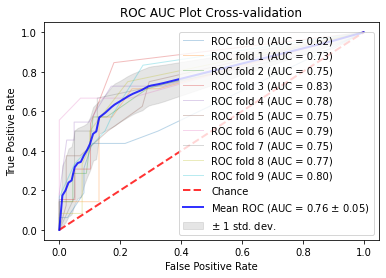

time: 891 ms


In [ ]:
machinelearning(X_kc2_1, y_kc2, GaussianNB(), 'NAIVE BAYES')

AUC TEST 0.7674923995045603
ROC AUC TEST 0.6513568291859024
NAIVE BAYES
AUC SKLEARN = 0.6744285553428668
AUC       =  0.7934295325339825
ACCURACY  =  0.8353047895500726
Recall    =  0.4094579032079032
Precision =  0.6532936507936508
Nilai G-Means = 0.6168997095645685
CONFISION MATRIX
TN : 393
TP : 43
FP : 22
FN : 64
PERHITUNGAN MANUAL
ACCURACY =  0.8352490421455939
RECALL|SENSITIVITAS|TPrate =  0.40186915887850466
PRECISION =  0.6615384615384615
BALANCE =  0.5753997289483318
SPECIFICITY|TNrate =  0.946987951807229
FPrate =  0.05301204819277108
AUC =  0.6744285553428667
G-MEANS =  0.6168997095645685


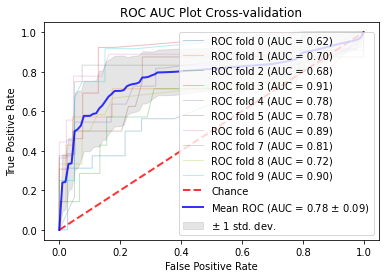

time: 927 ms


In [ ]:
machinelearning(X_kc2_2, y_kc2, GaussianNB(), 'NAIVE BAYES')

AUC TEST 0.8240738655556806
ROC AUC TEST 0.6711068573358855
NAIVE BAYES
AUC SKLEARN = 0.6984123409525954
AUC       =  0.8291952515851824
ACCURACY  =  0.8239840348330913
Recall    =  0.48918165168165173
Precision =  0.5926551226551227
Nilai G-Means = 0.6653216172711416
CONFISION MATRIX
TN : 378
TP : 52
FP : 37
FN : 55
PERHITUNGAN MANUAL
ACCURACY =  0.8237547892720306
RECALL|SENSITIVITAS|TPrate =  0.48598130841121495
PRECISION =  0.5842696629213483
BALANCE =  0.6311069807162373
SPECIFICITY|TNrate =  0.9108433734939759
FPrate =  0.0891566265060241
AUC =  0.6984123409525954
G-MEANS =  0.6653216172711416


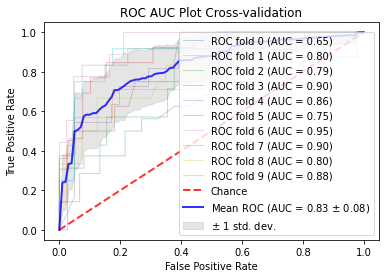

time: 981 ms


In [ ]:
machinelearning(X_kc2_3, y_kc2, GaussianNB(), 'NAIVE BAYES')

AUC TEST 0.8363810381713772
ROC AUC TEST 0.6837743497353901
NAIVE BAYES
AUC SKLEARN = 0.7299178020493188
AUC       =  0.8400811472715995
ACCURACY  =  0.8354136429608128
Recall    =  0.5475246975246975
Precision =  0.6027272727272727
Nilai G-Means = 0.7077514107741251
CONFISION MATRIX
TN : 377
TP : 59
FP : 38
FN : 48
PERHITUNGAN MANUAL
ACCURACY =  0.8352490421455939
RECALL|SENSITIVITAS|TPrate =  0.5514018691588785
PRECISION =  0.6082474226804123
BALANCE =  0.6762526726818967
SPECIFICITY|TNrate =  0.908433734939759
FPrate =  0.09156626506024096
AUC =  0.7299178020493188
G-MEANS =  0.7077514107741251


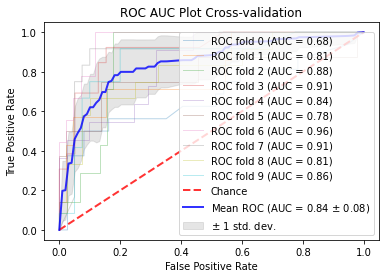

time: 895 ms


In [ ]:
machinelearning(X_kc2_4, y_kc2, GaussianNB(), 'NAIVE BAYES')

AUC TEST 0.8393311564013061
ROC AUC TEST 0.7173966895619861
NAIVE BAYES
AUC SKLEARN = 0.733093120144128
AUC       =  0.8483318665505098
ACCURACY  =  0.8239840348330913
Recall    =  0.5725246975246975
Precision =  0.5602131202131202
Nilai G-Means = 0.7168096063184373
CONFISION MATRIX
TN : 368
TP : 62
FP : 47
FN : 45
PERHITUNGAN MANUAL
ACCURACY =  0.8237547892720306
RECALL|SENSITIVITAS|TPrate =  0.5794392523364486
PRECISION =  0.5688073394495413
BALANCE =  0.6920246866928182
SPECIFICITY|TNrate =  0.8867469879518072
FPrate =  0.11325301204819277
AUC =  0.7330931201441279
G-MEANS =  0.7168096063184372


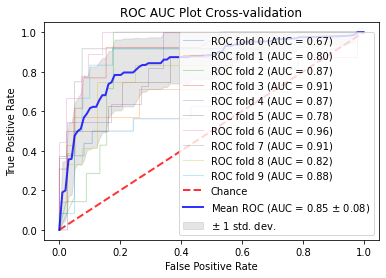

time: 901 ms


In [ ]:
machinelearning(X_kc2_5, y_kc2, GaussianNB(), 'NAIVE BAYES')

####LR

AUC TEST 0.758180385091769
ROC AUC TEST 0.5431145141312915
Logistic Regression
AUC SKLEARN = 0.6727845963292423
AUC       =  0.7624373398880945
ACCURACY  =  0.8162191582002902
Recall    =  0.4516837329337329
Precision =  0.5752994227994228
Nilai G-Means = 0.6274148259408457
CONFISION MATRIX
TN : 380
TP : 46
FP : 35
FN : 61
PERHITUNGAN MANUAL
ACCURACY =  0.8160919540229885
RECALL|SENSITIVITAS|TPrate =  0.42990654205607476
PRECISION =  0.5679012345679012
BALANCE =  0.5924958041357898
SPECIFICITY|TNrate =  0.9156626506024096
FPrate =  0.08433734939759036
AUC =  0.6727845963292423
G-MEANS =  0.6274148259408456


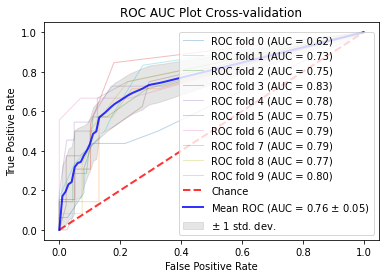

time: 1.32 s


In [ ]:
machinelearning(X_kc2_1, y_kc2, LogisticRegression(), 'Logistic Regression')

AUC TEST 0.8195473482715909
ROC AUC TEST 0.5431145141312915
Logistic Regression
AUC SKLEARN = 0.7020267987839207
AUC       =  0.824182772214215
ACCURACY  =  0.8296806966618288
Recall    =  0.49861596736596736
Precision =  0.6033910533910534
Nilai G-Means = 0.6679565646809803
CONFISION MATRIX
TN : 381
TP : 52
FP : 34
FN : 55
PERHITUNGAN MANUAL
ACCURACY =  0.8295019157088123
RECALL|SENSITIVITAS|TPrate =  0.48598130841121495
PRECISION =  0.6046511627906976
BALANCE =  0.6319460874364451
SPECIFICITY|TNrate =  0.9180722891566265
FPrate =  0.0819277108433735
AUC =  0.7020267987839207
G-MEANS =  0.6679565646809803


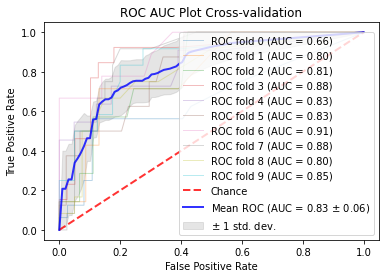

time: 1.44 s


In [ ]:
machinelearning(X_kc2_2, y_kc2, LogisticRegression(), 'Logistic Regression')

AUC TEST 0.8195360882783471
ROC AUC TEST 0.5477874113275532
Logistic Regression
AUC SKLEARN = 0.7354577187253688
AUC       =  0.820403163061858
ACCURACY  =  0.6898040638606677
Recall    =  0.8253621378621379
Precision =  0.3936081044879824
Nilai G-Means = 0.7313495737858063
CONFISION MATRIX
TN : 273
TP : 87
FP : 142
FN : 20
PERHITUNGAN MANUAL
ACCURACY =  0.6896551724137931
RECALL|SENSITIVITAS|TPrate =  0.8130841121495327
PRECISION =  0.3799126637554585
BALANCE =  0.7243036533828764
SPECIFICITY|TNrate =  0.6578313253012048
FPrate =  0.3421686746987952
AUC =  0.7354577187253688
G-MEANS =  0.7313495737858062


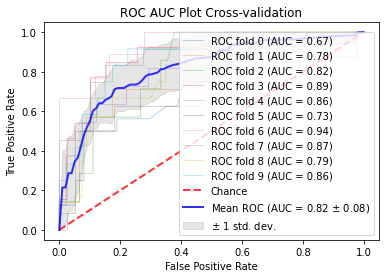

time: 1.46 s


In [ ]:
machinelearning(X_kc2_3, y_kc2, LogisticRegression(), 'Logistic Regression')

AUC TEST 0.8399954960027023
ROC AUC TEST 0.5559283864429682
Logistic Regression
AUC SKLEARN = 0.7589348046391172
AUC       =  0.8438490094689319
ACCURACY  =  0.7493468795355588
Recall    =  0.7947531635031635
Precision =  0.4471128909229596
Nilai G-Means = 0.7587495862136857
CONFISION MATRIX
TN : 308
TP : 83
FP : 107
FN : 24
PERHITUNGAN MANUAL
ACCURACY =  0.7490421455938697
RECALL|SENSITIVITAS|TPrate =  0.7757009345794392
PRECISION =  0.4368421052631579
BALANCE =  0.7583524642634311
SPECIFICITY|TNrate =  0.7421686746987952
FPrate =  0.25783132530120484
AUC =  0.7589348046391172
G-MEANS =  0.7587495862136857


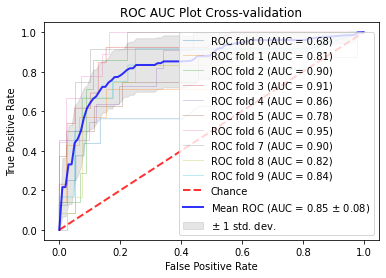

time: 1.52 s


In [ ]:
machinelearning(X_kc2_4, y_kc2, LogisticRegression(), 'Logistic Regression')

AUC TEST 0.8425289944826032
ROC AUC TEST 0.5839657696205381
Logistic Regression
AUC SKLEARN = 0.7743046954171827
AUC       =  0.8476446662498173
ACCURACY  =  0.7627358490566036
Recall    =  0.8054674492174492
Precision =  0.46564344189933105
Nilai G-Means = 0.7740440817637299
CONFISION MATRIX
TN : 313
TP : 85
FP : 102
FN : 22
PERHITUNGAN MANUAL
ACCURACY =  0.7624521072796935
RECALL|SENSITIVITAS|TPrate =  0.794392523364486
PRECISION =  0.45454545454545453
BALANCE =  0.7734125084159077
SPECIFICITY|TNrate =  0.7542168674698795
FPrate =  0.2457831325301205
AUC =  0.7743046954171827
G-MEANS =  0.7740440817637297


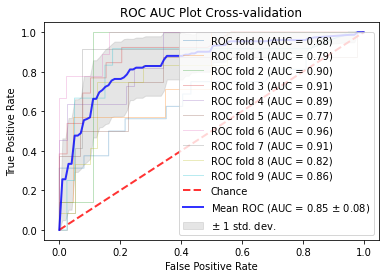

time: 1.5 s


In [ ]:
machinelearning(X_kc2_5, y_kc2, LogisticRegression(), 'Logistic Regression')

####KNN

AUC TEST 0.5572007656795406
ROC AUC TEST 0.644420673347596
k-NN
AUC SKLEARN = 0.7054160567503659
AUC       =  0.7598813928124715
ACCURACY  =  0.7356676342525399
Recall    =  0.6689498001998002
Precision =  0.4079731134878194
Nilai G-Means = 0.7035547619101289
CONFISION MATRIX
TN : 314
TP : 70
FP : 101
FN : 37
PERHITUNGAN MANUAL
ACCURACY =  0.735632183908046
RECALL|SENSITIVITAS|TPrate =  0.6542056074766355
PRECISION =  0.4093567251461988
BALANCE =  0.7009979770380793
SPECIFICITY|TNrate =  0.7566265060240964
FPrate =  0.2433734939759036
AUC =  0.7054160567503659
G-MEANS =  0.7035547619101289


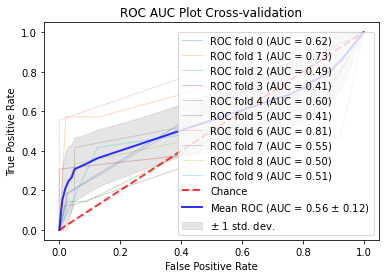

time: 1.2 s


In [ ]:
machinelearning(X_kc2_1, y_kc2, KNeighborsClassifier(), 'k-NN')

AUC TEST 0.6877829073302556
ROC AUC TEST 0.716777389933566
k-NN
AUC SKLEARN = 0.7230492061704763
AUC       =  0.7931314485968312
ACCURACY  =  0.7474963715529753
Recall    =  0.6886481573981574
Precision =  0.43866927190456606
Nilai G-Means = 0.7218968120992055
CONFISION MATRIX
TN : 317
TP : 73
FP : 98
FN : 34
PERHITUNGAN MANUAL
ACCURACY =  0.7471264367816092
RECALL|SENSITIVITAS|TPrate =  0.6822429906542056
PRECISION =  0.4269005847953216
BALANCE =  0.7200591322661808
SPECIFICITY|TNrate =  0.763855421686747
FPrate =  0.236144578313253
AUC =  0.7230492061704763
G-MEANS =  0.7218968120992055


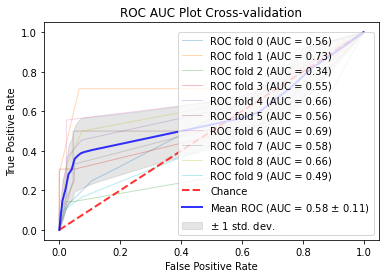

time: 1.11 s


In [ ]:
machinelearning(X_kc2_2, y_kc2, KNeighborsClassifier(), 'k-NN')

AUC TEST 0.8793379123972527
ROC AUC TEST 0.7142213714671771
k-NN
AUC SKLEARN = 0.739184776489134
AUC       =  0.795244199242708
ACCURACY  =  0.745500725689405
Recall    =  0.7351759351759353
Precision =  0.43046783625730994
Nilai G-Means = 0.7391142213664277
CONFISION MATRIX
TN : 311
TP : 78
FP : 104
FN : 29
PERHITUNGAN MANUAL
ACCURACY =  0.7452107279693486
RECALL|SENSITIVITAS|TPrate =  0.7289719626168224
PRECISION =  0.42857142857142855
BALANCE =  0.7389849000877278
SPECIFICITY|TNrate =  0.7493975903614458
FPrate =  0.25060240963855424
AUC =  0.739184776489134
G-MEANS =  0.7391142213664277


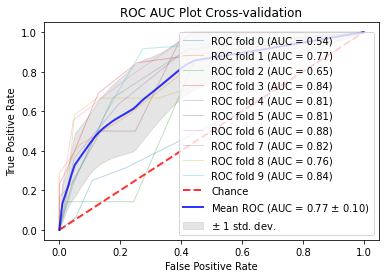

time: 1.06 s


In [ ]:
machinelearning(X_kc2_3, y_kc2, KNeighborsClassifier(), 'k-NN')

AUC TEST 0.8897534061479562
ROC AUC TEST 0.744522013286792
k-NN
AUC SKLEARN = 0.7462673122396126
AUC       =  0.8293744064303062
ACCURACY  =  0.751233671988389
Recall    =  0.7554674492174492
Precision =  0.436124561712797
Nilai G-Means = 0.74622497002511
CONFISION MATRIX
TN : 313
TP : 79
FP : 102
FN : 28
PERHITUNGAN MANUAL
ACCURACY =  0.7509578544061303
RECALL|SENSITIVITAS|TPrate =  0.7383177570093458
PRECISION =  0.43646408839779005
BALANCE =  0.746142811276755
SPECIFICITY|TNrate =  0.7542168674698795
FPrate =  0.2457831325301205
AUC =  0.7462673122396126
G-MEANS =  0.74622497002511


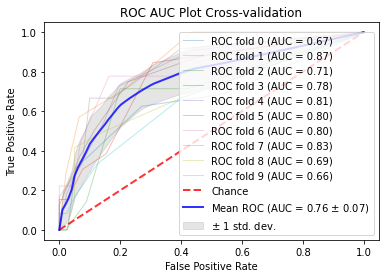

time: 1.13 s


In [ ]:
machinelearning(X_kc2_4, y_kc2, KNeighborsClassifier(), 'k-NN')

AUC TEST 0.8856998085801149
ROC AUC TEST 0.7502533498479902
k-NN
AUC SKLEARN = 0.7782119130728522
AUC       =  0.8054313687401653
ACCURACY  =  0.780043541364296
Recall    =  0.7849317349317351
Precision =  0.4762469900240799
Nilai G-Means = 0.7782078621008104
CONFISION MATRIX
TN : 324
TP : 83
FP : 91
FN : 24
PERHITUNGAN MANUAL
ACCURACY =  0.7796934865900383
RECALL|SENSITIVITAS|TPrate =  0.7757009345794392
PRECISION =  0.47701149425287354
BALANCE =  0.778197699480374
SPECIFICITY|TNrate =  0.7807228915662651
FPrate =  0.21927710843373494
AUC =  0.7782119130728522
G-MEANS =  0.7782078621008104


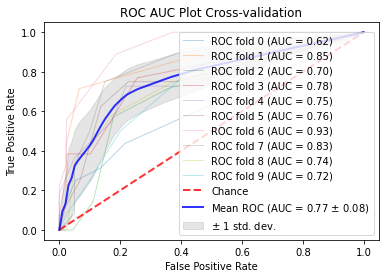

time: 1.13 s


In [ ]:
machinelearning(X_kc2_5, y_kc2, KNeighborsClassifier(), 'k-NN')

###EXPLORING NASA DATASET

####Detail Dataset

In [ ]:
Dataset = {'Dataset': ['CM1', 'JM1', 'KC1', 'KC2', 'KC3', 'MC1', 'MC2', 'MW1', 'PC1', 'PC2', 'PC3', 'PC4'],
           'Data': [data_cm1.shape[0], data_jm1.shape[0],data_kc1.shape[0],data_kc2.shape[0],data_kc3.shape[0],data_mc1.shape[0],data_mc2.shape[0],
                   data_mw1.shape[0], data_pc1.shape[0],data_pc2.shape[0], data_pc3.shape[0],data_pc4.shape[0]],
           'Feature': [data_cm1.shape[1], data_jm1.shape[1],data_kc1.shape[1],data_kc2.shape[1], data_kc3.shape[1],data_mc1.shape[1],data_mc2.shape[1],
                   data_mw1.shape[1],data_pc1.shape[1],data_pc2.shape[1],data_pc3.shape[1],data_pc4.shape[1]]
        }

df = pd.DataFrame(Dataset, columns = ['Dataset', 'Data','Feature'])
df

Dataset   Data  Feature
0      CM1    498       22
1      JM1  10880       22
2      KC1   2109       22
3      KC2    522       22
4      KC3    194       40
5      MC1   1988       39
6      MC2    125       40
7      MW1    253       38
8      PC1   1109       22
9      PC2    745       37
10     PC3   1077       38
11     PC4   1458       38

time: 30 ms


####Grafik Jumlah Data


<BarContainer object of 12 artists>

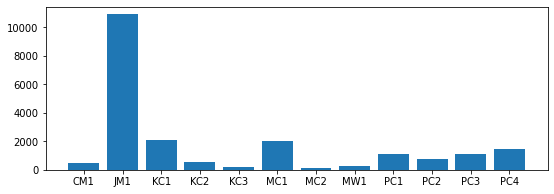

time: 194 ms


In [ ]:
#Grafik Jumlah Data
names = ['CM1', 'JM1', 'KC1', 'KC2', 'KC3', 'MC1', 'MC2', 'MW1', 'PC1', 'PC2', 'PC3', 'PC4']
values_data = [data_cm1.shape[0], data_jm1.shape[0],data_kc1.shape[0],data_kc2.shape[0],data_kc3.shape[0],data_mc1.shape[0],data_mc2.shape[0],
                data_mw1.shape[0], data_pc1.shape[0],data_pc2.shape[0], data_pc3.shape[0],data_pc4.shape[0]]
plt.figure(figsize=(9, 3))
plt.bar(names, values_data)

####Grafik Jumlah Fitur

<BarContainer object of 12 artists>

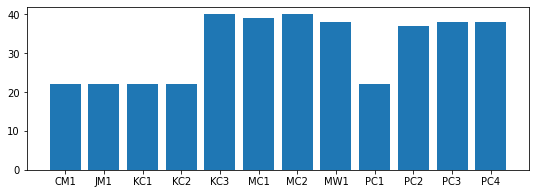

time: 188 ms


In [ ]:
#Grafik Jumlah Fitur
values_feature = [data_cm1.shape[1], data_jm1.shape[1],data_kc1.shape[1],data_kc2.shape[1], data_kc3.shape[1],data_mc1.shape[1],data_mc2.shape[1],
                   data_mw1.shape[1],data_pc1.shape[1],data_pc2.shape[1],data_pc3.shape[1],data_pc4.shape[1]]
plt.figure(figsize=(9, 3))
plt.bar(names, values_feature)

####Grafik Ketidakseimbangan Kelas tiap Dataset

In [ ]:

from plotly.offline import iplot
import plotly.graph_objs as go

def defectrate(data, target, name):
    defects_true_false = data.groupby(target)[target].apply(lambda x: x.count()) #defect rates (true/false)
    print('================', name ,'====================')
    print('Total Data : ', data.shape[0])
    print('Non-Defect : ' , defects_true_false[0])
    print('Defect     : ' , defects_true_false[1])

    kategori = ['Non-Defect' ,'Defect']
    jumlah = [defects_true_false[0], defects_true_false[1]]
    fig, ax = plt.subplots()
    fig = ax.bar(kategori, jumlah)
    fig = ax.set_xlabel('Category')
    fig = ax.set_ylabel('Row')
    fig = ax.set_title('Defect Rate ' + str(name))

time: 1.09 s


================ CM1 ====================
Total Data :  498
Non-Defect :  449
Defect     :  49
================ JM1 ====================
Total Data :  10880
Non-Defect :  8777
Defect     :  2103
================ KC1 ====================
Total Data :  2109
Non-Defect :  1783
Defect     :  326
================ KC2 ====================
Total Data :  522
Non-Defect :  415
Defect     :  107
================ KC3 ====================
Total Data :  194
Non-Defect :  158
Defect     :  36
================ MC1 ====================
Total Data :  1988
Non-Defect :  1942
Defect     :  46
================ MC2 ====================
Total Data :  125
Non-Defect :  81
Defect     :  44
================ MW1 ====================
Total Data :  253
Non-Defect :  226
Defect     :  27
================ PC1 ====================
Total Data :  1109
Non-Defect :  1032
Defect     :  77
================ PC2 ====================
Total Data :  745
Non-Defect :  729
Defect     :  16
================ PC3 =================

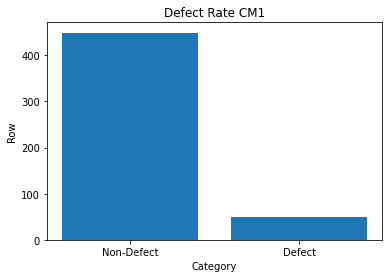

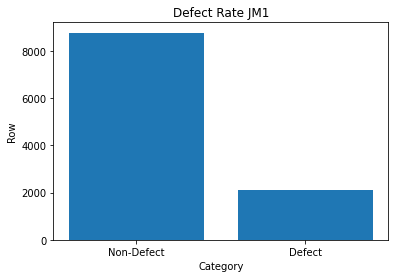

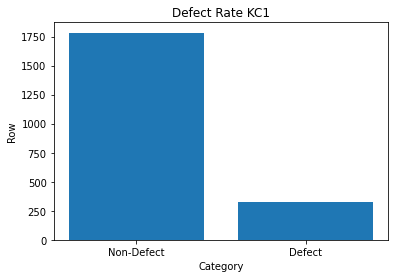

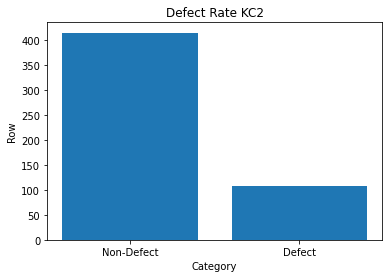

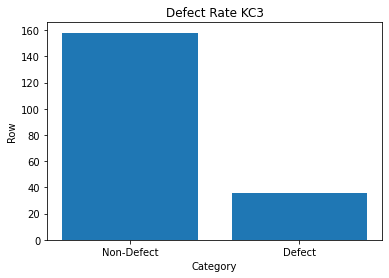

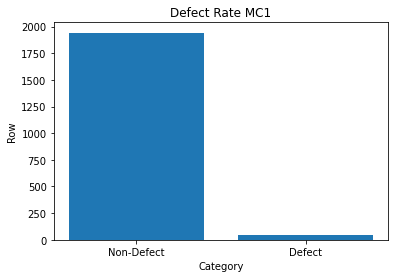

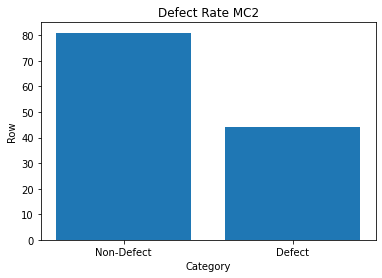

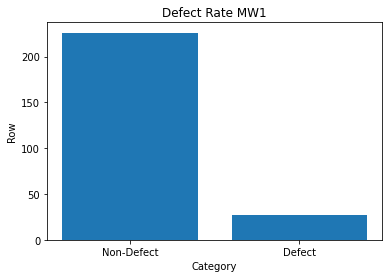

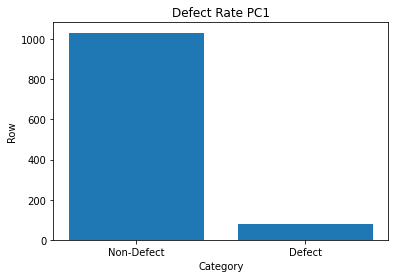

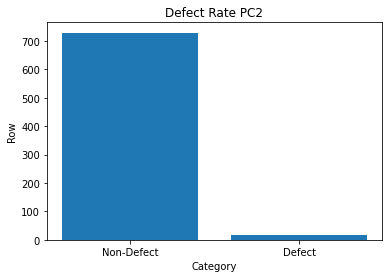

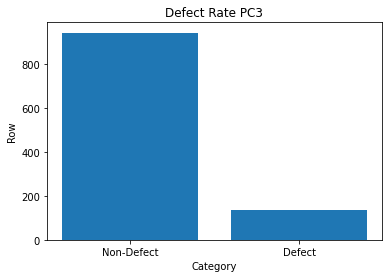

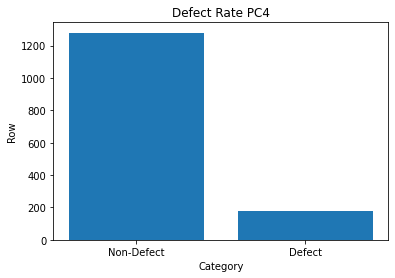

time: 1.78 s


In [ ]:
defectrate(data_cm1, 'class', 'CM1')
defectrate(data_jm1, 'defects', 'JM1')
defectrate(data_kc1, 'class', 'KC1')
defectrate(data_kc2, 'class', 'KC2')
defectrate(data_kc3, 'Defective', 'KC3')
defectrate(data_mc1, 'Defective', 'MC1')
defectrate(data_mc2, 'Defective', 'MC2')
defectrate(data_mw1, 'Defective', 'MW1')
defectrate(data_pc1, 'class', 'PC1')
defectrate(data_pc2, 'Defective', 'PC2')
defectrate(data_pc3, 'Defective', 'PC3')
defectrate(data_pc4, 'c', 'PC4')

###NORMALISASI DATA

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_cm1 = pd.DataFrame(scaler.fit_transform(X_cm1), index=X_cm1.index, columns=X_cm1.columns)
X_jm1 = pd.DataFrame(scaler.fit_transform(X_jm1), index=X_jm1.index, columns=X_jm1.columns)
X_kc1 = pd.DataFrame(scaler.fit_transform(X_kc1), index=X_kc1.index, columns=X_kc1.columns)
X_kc2 = pd.DataFrame(scaler.fit_transform(X_kc2), index=X_kc2.index, columns=X_kc2.columns)
X_pc1 = pd.DataFrame(scaler.fit_transform(X_pc1), index=X_pc1.index, columns=X_pc1.columns)
X_pc2 = pd.DataFrame(scaler.fit_transform(X_pc2), index=X_pc2.index, columns=X_pc2.columns)
X_pc4 = pd.DataFrame(scaler.fit_transform(X_pc4), index=X_pc4.index, columns=X_pc4.columns)

time: 62.5 ms


In [ ]:
X_kc1

loc      v(g)  ev(g)  ...  total_Op  total_Opnd  branchCount
0     0.000348  0.009091  0.016  ...  0.001770    0.002804     0.004545
1     0.000000  0.000000  0.000  ...  0.001475    0.002336     0.000000
2     0.285714  0.227273  0.000  ...  0.157817    0.149533     0.227273
3     0.156794  0.159091  0.200  ...  0.131268    0.121495     0.159091
4     0.083624  0.045455  0.000  ...  0.060472    0.039720     0.045455
...        ...       ...    ...  ...       ...         ...          ...
2104  0.062718  0.022727  0.000  ...  0.036873    0.035047     0.022727
2105  0.076655  0.045455  0.080  ...  0.057522    0.049065     0.045455
2106  0.003484  0.000000  0.000  ...  0.004425    0.002336     0.000000
2107  0.041812  0.000000  0.000  ...  0.013274    0.018692     0.000000
2108  0.034843  0.022727  0.000  ...  0.026549    0.021028     0.022727

[2109 rows x 21 columns]

time: 47.8 ms


###10-CROSS-VALIDATION

In [ ]:
#mengimport model validasi
from sklearn.model_selection import KFold
#memanggil fungsi cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

time: 1.37 ms


###PERFORMANCE FORMULA

In [ ]:
def performance(tn, tp, fp, fn):
    #ACCURACY
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    #RECALL=SENSITIVITAS=TPrate
    sensitivitas = tp/(tp+fn)
    #PRECISION
    precision = tp/(tp+fp)
    #FPrate
    FP_rate = fp/(fp+tn)
    #BALANCE
    bal = 1 - ((math.sqrt((1-sensitivitas)**2+ FP_rate**2))/(math.sqrt(2)))
    #SPECIFICITY=TNrate
    specificity = tn/(tn+fp)
    #AUC
    auc = (1+sensitivitas-FP_rate)/2
    #G-MEANS
    gmeans = math.sqrt(sensitivitas*specificity)

    print('ACCURACY = ', accuracy)
    print('RECALL|SENSITIVITAS|TPrate = ', sensitivitas)
    print('PRECISION = ', precision)
    print('BALANCE = ', bal)
    print('SPECIFICITY|TNrate = ', specificity)
    print('FPrate = ', FP_rate)
    print('AUC = ', auc)
    print('G-MEANS = ', gmeans)

time: 15.7 ms


#MODEL SKENARIO 1 ORIGINAL MACHINE LEARNING

In [ ]:
def machinelearning(X, y, model, name):
    #i = 0
    #for train_index, test_index in kfold.split(X):
        #print("-------------------------------------------------")
        #X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index].ravel(), y[test_index].ravel()
    estimator = BalancedBaggingClassifier(base_estimator=model, sampling_strategy='auto', replacement=False, random_state=42)

    cv_results = cross_validate(model, X, y, cv=kfold, scoring=['accuracy','roc_auc','recall','precision'])
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    
    est = model
    est.fit(X, y)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y, est.predict_proba(X)[:,1])
    print('AUC TEST', auc(false_positive_rate, true_positive_rate))
    print('ROC AUC TEST',metrics.roc_auc_score(y, est.predict(X)))

    print('===========================')
    print(name)
    print('===========================')
    print ("AUC SKLEARN =", metrics.roc_auc_score(y, y_pred))
    print('AUC       = ', cv_results['test_roc_auc'].mean())
    print('ACCURACY  = ', cv_results['test_accuracy'].mean())
    print('Recall    = ', cv_results['test_recall'].mean())
    print('Precision = ', cv_results['test_precision'].mean())
    print('Nilai G-Means = {}'.format(geometric_mean_score(y,y_pred)))


    print('=============================')
    print('CONFISION MATRIX')
    print('=============================')
    print('TN :', tn)
    print('TP :', tp)
    print('FP :', fp)
    print('FN :', fn)

    print('=============================')
    print('PERHITUNGAN MANUAL')
    print('=============================')  
    performance(tn, tp, fp, fn)


    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(kfold.split(X, y)):
        model.fit(X.iloc[train], y.iloc[train])
        viz = plot_roc_curve(model, X.iloc[test], y.iloc[test],
                            name='ROC fold {}'.format(i),
                            alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="ROC AUC Plot Cross-validation")
    ax.legend(loc="lower right")
    plt.show()
        #i = i + 1
        #print('Fold', i)
        #performance(y_test, y_pred)

time: 85.8 ms


#MODEL SKENARIO 2 OPTIMASI MACHINE LEARNING + BAGGING + GENETIC ALGORITHM

In [ ]:
class FeatureSelectionGA:
    def __init__(self, model, name, x, y, cv_split=10, random_state=24, n_pop=10, n_gen=10):
        self.model = model
        self.n_features = x.shape[1]
        self.cv_split = cv_split
        self.x = x
        self.y = y
        self.random_state = random_state
        self.n_pop = n_pop
        self.n_gen = n_gen
        self.name = name
        print("The number of Features received by the system is : {}".format(self.n_features))
        print("The Shape of Training Data is : {} and Target Data is : {}".format(self.x.shape, self.y.shape))

        individual = [1 for i in range(x.shape[1])]
        print("AUC + Bagging For All the features : " + str(self.fitness_test(individual)))
        print("__________________________________________________________________________ \n")
        print("Feature Selection Optimization using Genetic Algorithm")

        # Applying Genetic Algorithm
        hof = self.evolutionary_algorithm()
        accuracy, individual, header = self.bestIndividual(hof)
        print("__________________________________________________________________________")
        print('=================================')
        print(self.name, 'OPTIMAL FEATURE SUBSET')
        print('=================================')
        print('Best AUC : \t' + str(accuracy[0]))    
        print('Number of Features in Subset : \t' + str(individual.count(1)))
        print('Fitness of the best individual : \t' + str(individual))
        print('Feature Subset : ' + str(header)+'\t')
        print("__________________________________________________________________________")
        print('\n\nCreate a ', self.name ,' Classifier with the Above Feature Set')

        #kfold = KFold(n_splits=self.cv_split, shuffle=True, random_state=42)

        X_selection = self.x[header]
        estimator = BalancedBaggingClassifier(base_estimator=self.model, sampling_strategy='auto', replacement=True, random_state=42)
        cv_results = cross_validate(estimator, X_selection, self.y, cv=self.cv_split, scoring=['accuracy','roc_auc','recall','precision'])
        y_pred = cross_val_predict(estimator, X_selection, self.y, cv=self.cv_split)
        tn, fp, fn, tp = confusion_matrix(self.y, y_pred).ravel()

        print('=============================')
        print('CONFISION MATRIX')
        print('=============================')
        print('TN :', tn)
        print('TP :', tp)
        print('FP :', fp)
        print('FN :', fn)

        print('=================================')
        print('EVALUATION PERFORMANCE BY SKLEARN')
        print('=================================')
        print('Nilai Accuracy = ', cv_results['test_accuracy'].mean())
        print("AUC SKLEARN =", metrics.roc_auc_score(self.y, y_pred))
        print('Nilai AUC       = ', cv_results['test_roc_auc'].mean())
        print('Nilai Recall    = ', cv_results['test_recall'].mean())
        print('Nilai Precision = ', cv_results['test_precision'].mean())
        print('Nilai G-Means = {}'.format(geometric_mean_score(y,y_pred)))

        print('=============================')
        print('PERHITUNGAN MANUAL')
        print('=============================')  
        performance(tn, tp, fp, fn)

        


    def fitness_test(self, individual):
        if (individual.count(0) != len(individual)):
            # Fetched the Index of the Individual
            cols = [index for index in range(len(individual)) if individual[index] == 0]

            # Fetching Feature Subset
            X_parsed = self.x.drop(self.x.columns[cols], axis=1)
            X_subset = pd.get_dummies(X_parsed)

            # Applying the Classification Algorithm
            classifier = self.model
            estimator = BalancedBaggingClassifier(base_estimator=classifier, sampling_strategy='auto', replacement=True, random_state=42)
            y_pred = cross_val_predict(estimator, X_subset, self.y, cv=self.cv_split)
            #cross_v=cross_val_score(estimator, X_subset, self.y, cv=self.cv_split)
            return ((metrics.roc_auc_score(self.y, y_pred)),0)
        else:
            return (0,)
    
    def evolutionary_algorithm(self):
        # Creating the Individual Using DEAP
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMax)

        # Creating ToolBox For The DEAP Framework
        toolbox = base.Toolbox()
        toolbox.register("attr_bool", random.randint, 0, 1)
        toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, self.n_features)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        toolbox.register("evaluate", self.fitness_test)
        toolbox.register("mate", tools.cxOnePoint)
        toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
        toolbox.register("select", tools.selTournament, tournsize=3)

        # Initialize Parameters
        pop = toolbox.population(n=self.n_pop)
        hof = tools.HallOfFame(self.n_pop * self.n_gen)
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("std", np.std)
        stats.register("min", np.min)
        stats.register("max", np.max)

        #Probabilitas cross over yang baik berada pada kisaran 0.5 sampai dengan 0.95
        #Probabilitas mutasi yang baik berada pada kisaran 0 sampai dengan 0.3. Probabilitas mutasi yang terlalu kecil menyebabkan terjebak dalam optimum lokal, dan probabilitas mutasi yang terlalu besar menyebabkan konvergensi sulit didapatkan
        #Nilai fitness merupakan suatu ukuran baik tidaknya suatusolusi yang dinyatakan sebagai satu individu
        #Seleksi dengan Turnamen, model ini merupakan model yang variansinya kecil sehingga kemungkinan munculnya individu superior dapat dikurangi

        # Genetic Algorithm
        pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=self.n_gen, stats=stats, halloffame=hof,verbose=True)

        plt.figure(figsize=(11, 4))
        plots = plt.plot(log.select('max'),'c-', log.select('avg'), 'b-', log.select('min'), 'r-')
        plt.legend(plots, ('Maximum fitness', 'Mean fitness', 'Minimum fitness'), frameon=True)
        plt.ylabel('Fitness'); plt.xlabel('Iterations')
        plt.title('Fitness Rate by Generation')

        # Return Fall Of Home
        return hof

    def bestIndividual(self, hof):
        maxAccurcy = 0.0
        for individual in hof:
            if (individual.fitness.values[0] > maxAccurcy):
                maxAccurcy = individual.fitness.values[0]
                _individual = individual

        _individualHeader = [list(self.x)[i] for i in range(len(_individual)) if _individual[i] == 1]
        return _individual.fitness.values, _individual, _individualHeader


time: 236 ms


The number of Features received by the system is : 21
The Shape of Training Data is : (522, 21) and Target Data is : (522,)
AUC + Bagging For All the features : (0.7160454903727057, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.710251	0.0148789	0.678955	0.735942
1  	25    	0.724393	0.00922751	0.703378	0.752224
2  	29    	0.728891	0.0071678 	0.709109	0.752224
3  	30    	0.732349	0.0069252 	0.720718	0.752224
4  	36    	0.736366	0.00947856	0.720572	0.754487
5  	22    	0.742814	0.00825561	0.713929	0.754487
6  	24    	0.746293	0.00746384	0.721777	0.754487
7  	31    	0.74729 	0.00979916	0.714841	0.754487
8  	28    	0.750021	0.00637225	0.728859	0.754487
9  	38    	0.751595	0.00481644	0.731269	0.754487
10 	32    	0.75332 	0.00250384	0.740468	0.754487
11 	33    	0.753586	0.00339405	0.734444	0.754487
12 	31    	0.752138	0.00757063	0.718455	0.754487

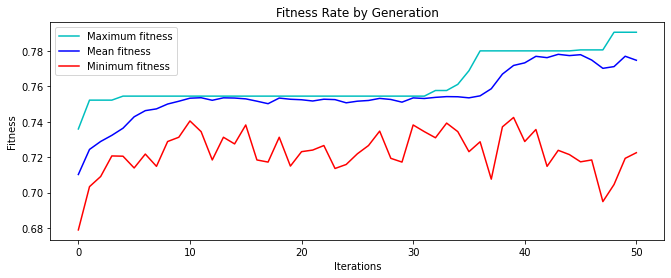

time: 7min 17s


In [ ]:
FeatureSelectionGA(GaussianNB(), 'NAIVE BAYES', X_kc2, y_kc2, cv_split=kfold, n_pop=50, n_gen=50)

####LOGISTIC REGRESSION

#####CM1

######ORIGINAL

Logistic Regression
AUC SKLEARN = 0.5079769101404482
AUC       =  0.7891320174437562
ACCURACY  =  0.899469387755102
Recall    =  0.016666666666666666
Precision =  0.1
Nilai G-Means = 0.1425386204031757
CONFISION MATRIX
TN : 447
TP : 1
FP : 2
FN : 48
PERHITUNGAN MANUAL
ACCURACY =  0.8995983935742972
RECALL|SENSITIVITAS|TPrate =  0.02040816326530612
PRECISION =  0.3333333333333333
BALANCE =  0.30731680842946907
SPECIFICITY|TNrate =  0.9955456570155902
FPrate =  0.004454342984409799
AUC =  0.5079769101404482
G-MEANS =  0.1425386204031757


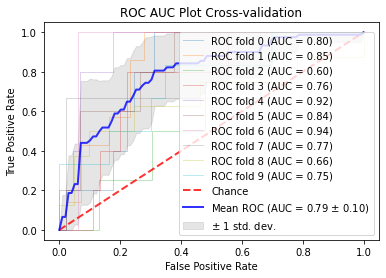

time: 955 ms


In [ ]:
machinelearning(X_cm1, y_cm1, LogisticRegression(), 'Logistic Regression')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (498, 21) and Target Data is : (498,)
AUC For All the features : (0.6561747193309395, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max    
0  	50    	0.648694	0.0105998	0.620745	0.66972
1  	25    	0.653721	0.00877746	0.632426	0.66972
2  	28    	0.657969	0.00790587	0.642266	0.66972
3  	26    	0.66303 	0.00741895	0.639107	0.66972
4  	27    	0.6671  	0.00297608	0.654879	0.66972
5  	27    	0.665864	0.00636866	0.637994	0.66972
6  	26    	0.665816	0.00843781	0.626312	0.670833
7  	29    	0.667044	0.00566392	0.645971	0.670833
8  	22    	0.667375	0.0059736 	0.636335	0.670833
9  	33    	0.669052	0.00364325	0.64913 	0.674174
10 	17    	0.668677	0.00555025	0.644493	0.674174
11 	26    	0.670377	0.00402448	0.645971	0.674174
12 	28    	0.670733	0.00346161	0.658402	0.674174
13 	28    	0.671

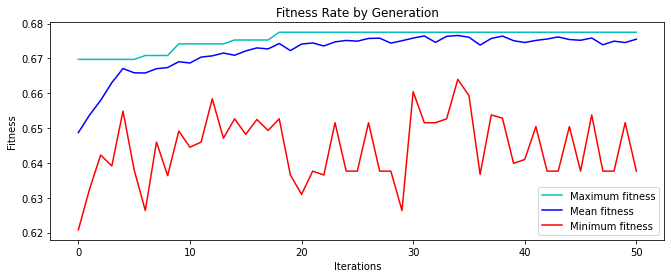

time: 15min 17s


In [ ]:
FeatureSelectionGA(LogisticRegression(), 'Logistic Regression', X_cm1, y_cm1, cv_split=kfold, n_pop=50, n_gen=50)

#####JM1

######ORIGINAL

Logistic Regression
AUC SKLEARN = 0.5279209900557648
AUC       =  0.7016178435933265
ACCURACY  =  0.8112132352941176
Recall    =  0.06640124140385215
Precision =  0.6145153287258551
Nilai G-Means = 0.25577001288757084
CONFISION MATRIX
TN : 8687
TP : 139
FP : 90
FN : 1964
PERHITUNGAN MANUAL
ACCURACY =  0.8112132352941176
RECALL|SENSITIVITAS|TPrate =  0.06609605325725154
PRECISION =  0.6069868995633187
BALANCE =  0.3395903817486604
SPECIFICITY|TNrate =  0.9897459268542782
FPrate =  0.010254073145721772
AUC =  0.5279209900557649
G-MEANS =  0.25577001288757084


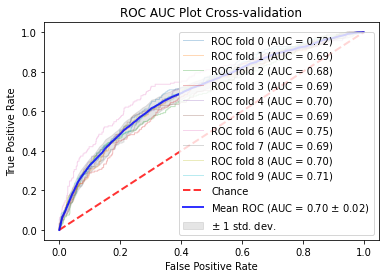

time: 3.06 s


In [ ]:
machinelearning(X_jm1, y_jm1, LogisticRegression(), 'Logistic Regression')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (10880, 21) and Target Data is : (10880,)
AUC + Bagging For All the features : (0.6493122153711844, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.629507	0.0102474	0.612382	0.651639
1  	22    	0.636129	0.0105417	0.619938	0.651639
2  	25    	0.645656	0.0074336	0.627401	0.651639
3  	25    	0.649964	0.00167825	0.643898	0.651639
4  	32    	0.649869	0.00432283	0.626632	0.652358
5  	24    	0.651543	0.000460054	0.64947 	0.652063
6  	29    	0.651692	0.000517082	0.648424	0.652063
7  	29    	0.650108	0.00565668 	0.628717	0.652276
8  	30    	0.650754	0.00440339 	0.627399	0.652276
9  	31    	0.65051 	0.0055754  	0.626016	0.652276
10 	29    	0.651288	0.00353694 	0.628009	0.652276
11 	26    	0.651572	0.00301164 	0.631471	0.652276
12 	36    	0.650978	0.0051677  	0.62531

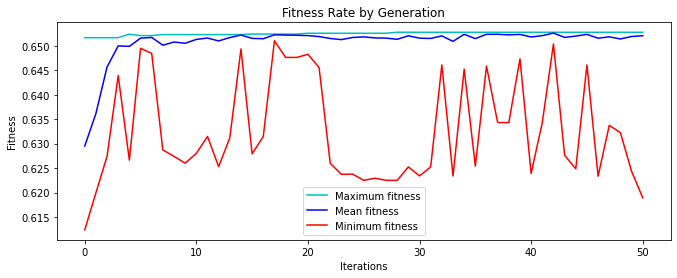

time: 1h 29min 50s


In [ ]:
FeatureSelectionGA(LogisticRegression(), 'Logistic Regression', X_jm1, y_jm1, cv_split=kfold, n_pop=50, n_gen=50)

#####KC1

######ORIGINAL

Logistic Regression
AUC SKLEARN = 0.5762234670318516
AUC       =  0.7929345947136799
ACCURACY  =  0.8577702550214399
Recall    =  0.1638470471481685
Precision =  0.6204151404151403
Nilai G-Means = 0.4073912225217405
CONFISION MATRIX
TN : 1754
TP : 55
FP : 29
FN : 271
PERHITUNGAN MANUAL
ACCURACY =  0.8577524893314367
RECALL|SENSITIVITAS|TPrate =  0.1687116564417178
PRECISION =  0.6547619047619048
BALANCE =  0.4120778744893562
SPECIFICITY|TNrate =  0.9837352776219854
FPrate =  0.016264722378014584
AUC =  0.5762234670318516
G-MEANS =  0.4073912225217405


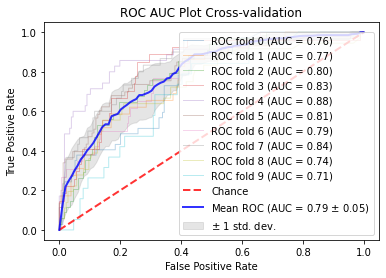

time: 1.21 s


In [ ]:
machinelearning(X_kc1, y_kc1, LogisticRegression(), 'Logistic Regression')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (2109, 21) and Target Data is : (2109,)
AUC For All the features : (0.7020118432778559, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std       	min     	max     
0  	50    	0.700116	0.00571099	0.685153	0.711152
1  	27    	0.704544	0.00495912	0.693016	0.714219
2  	20    	0.708566	0.00330524	0.698916	0.714219
3  	34    	0.710341	0.00347548	0.697857	0.716314
4  	29    	0.711559	0.00418606	0.68937 	0.716314
5  	33    	0.713543	0.00213249	0.705297	0.716874
6  	23    	0.715057	0.00170149	0.709171	0.716874
7  	32    	0.715945	0.00180207	0.704341	0.717155
8  	23    	0.716351	0.00105265	0.711152	0.717155
9  	34    	0.716647	0.000627251	0.71379 	0.717155
10 	30    	0.716492	0.00215583 	0.702475	0.717155
11 	27    	0.716371	0.00292091 	0.697113	0.717155
12 	32    	0.715882	0.00443142 	0.693411	0.717155
1

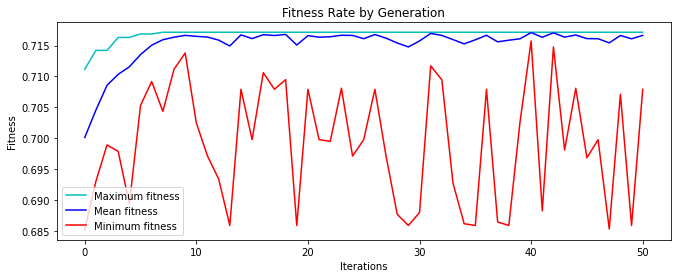

time: 24min 48s


In [ ]:
FeatureSelectionGA(LogisticRegression(), 'Logistic Regression', X_kc1, y_kc1, cv_split=kfold, n_pop=50, n_gen=50)

#####KC2

######ORIGINAL

Logistic Regression
AUC SKLEARN = 0.6142664114401531
AUC       =  0.8528523876727563
ACCURACY  =  0.8334179970972425
Recall    =  0.25050227550227555
Precision =  0.8416666666666668
Nilai G-Means = 0.4893644207678754
CONFISION MATRIX
TN : 409
TP : 26
FP : 6
FN : 81
PERHITUNGAN MANUAL
ACCURACY =  0.8333333333333334
RECALL|SENSITIVITAS|TPrate =  0.24299065420560748
PRECISION =  0.8125
BALANCE =  0.4646159422869014
SPECIFICITY|TNrate =  0.9855421686746988
FPrate =  0.014457831325301205
AUC =  0.6142664114401531
G-MEANS =  0.4893644207678754


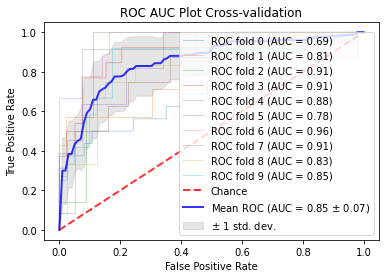

time: 741 ms


In [ ]:
machinelearning(X_kc2, y_kc2, LogisticRegression(), 'Logistic Regression')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (522, 21) and Target Data is : (522,)
AUC For All the features : (0.7818263709041774, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min    	max    
0  	50    	0.772915	0.0142912	0.72163	0.79026
1  	37    	0.780089	0.00511391	0.762808	0.78785
2  	32    	0.782498	0.00509555	0.763022	0.78785
3  	28    	0.784413	0.00521274	0.751785	0.789055
4  	33    	0.786865	0.00317674	0.771129	0.79026 
5  	33    	0.787859	0.00193158	0.780914	0.79026 
6  	26    	0.78832 	0.0030213 	0.770364	0.791465
7  	25    	0.788729	0.00372471	0.770071	0.79267 
8  	28    	0.788916	0.00354005	0.776241	0.79267 
9  	34    	0.790013	0.00322595	0.7773  	0.79267 
10 	37    	0.790357	0.00459835	0.770476	0.79267 
11 	25    	0.791926	0.00280004	0.773539	0.79267 
12 	32    	0.791496	0.00410962	0.771681	0.79267 
13 	36    	0.79

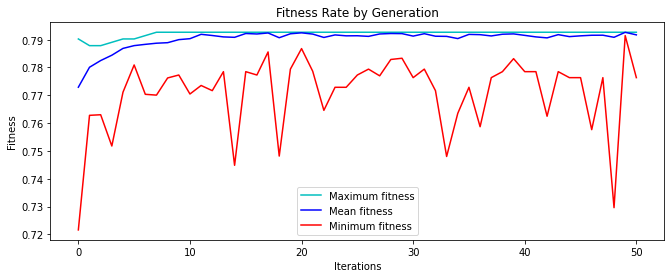

time: 17min 43s


In [ ]:
FeatureSelectionGA(LogisticRegression(), 'Logistic Regression', X_kc2, y_kc2, cv_split=kfold, n_pop=50, n_gen=50)

#####PC1

######ORIGINAL

Logistic Regression
AUC SKLEARN = 0.51153352461492
AUC       =  0.7751226810274245
ACCURACY  =  0.9296396396396398
Recall    =  0.024285714285714285
Precision =  0.13333333333333333
Nilai G-Means = 0.160930171455096
CONFISION MATRIX
TN : 1029
TP : 2
FP : 3
FN : 75
PERHITUNGAN MANUAL
ACCURACY =  0.9296663660955816
RECALL|SENSITIVITAS|TPrate =  0.025974025974025976
PRECISION =  0.4
BALANCE =  0.31125656134122104
SPECIFICITY|TNrate =  0.997093023255814
FPrate =  0.0029069767441860465
AUC =  0.51153352461492
G-MEANS =  0.160930171455096


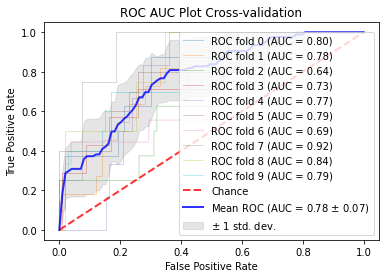

time: 898 ms


In [ ]:
machinelearning(X_pc1, y_pc1, LogisticRegression(), 'Logistic Regression')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (1109, 21) and Target Data is : (1109,)
AUC For All the features : (0.632405869324474, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max    
0  	50    	0.634523	0.0108488	0.608175	0.65809
1  	29    	0.644415	0.00690387	0.630468	0.65809
2  	35    	0.649648	0.00816845	0.624748	0.664584
3  	30    	0.654644	0.00753511	0.628819	0.665068
4  	24    	0.659893	0.00563587	0.627366	0.665068
5  	36    	0.66156 	0.00595465	0.63289 	0.665068
6  	24    	0.663593	0.00357432	0.642196	0.665068
7  	26    	0.664359	0.00164147	0.657606	0.665068
8  	26    	0.663597	0.00376309	0.648784	0.665068
9  	33    	0.664357	0.00264883	0.649269	0.665553
10 	32    	0.664446	0.00229074	0.65334 	0.665553
11 	25    	0.664838	0.00140844	0.65809 	0.666522
12 	25    	0.662925	0.00591463	0.639774	0.666522
13 	30    	

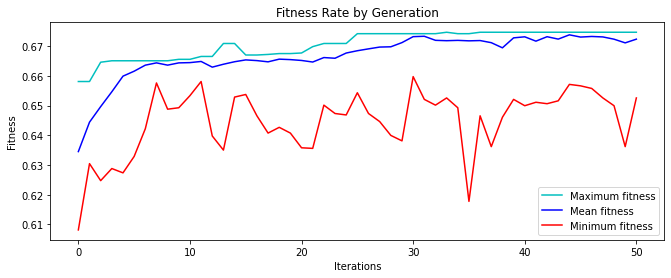

time: 16min 40s


In [ ]:
FeatureSelectionGA(LogisticRegression(), 'Logistic Regression', X_pc1, y_pc1, cv_split=kfold, n_pop=50, n_gen=50)

#####PC2

######ORIGINAL

Logistic Regression
AUC SKLEARN = 0.4993141289437586
AUC       =  0.7574624281816063
ACCURACY  =  0.9772252252252251
Recall    =  0.0
Precision =  0.0
Nilai G-Means = 0.0
CONFISION MATRIX
TN : 728
TP : 0
FP : 1
FN : 16
PERHITUNGAN MANUAL
ACCURACY =  0.9771812080536912
RECALL|SENSITIVITAS|TPrate =  0.0
PRECISION =  0.0
BALANCE =  0.292892553540686
SPECIFICITY|TNrate =  0.9986282578875172
FPrate =  0.0013717421124828531
AUC =  0.4993141289437586
G-MEANS =  0.0


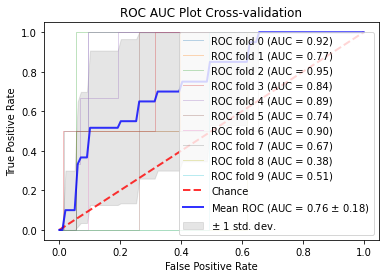

time: 869 ms


In [ ]:
machinelearning(X_pc2, y_pc2, LogisticRegression(), 'Logistic Regression')

######OPTIMASI GA+B

The number of Features received by the system is : 36
The Shape of Training Data is : (745, 36) and Target Data is : (745,)
AUC For All the features : (0.7106910150891632, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.676743	0.0381626	0.616255	0.763589
1  	38    	0.701892	0.035882 	0.614198	0.795525
2  	35    	0.71964 	0.0324218	0.611754	0.790038
3  	35    	0.73382 	0.0353144	0.633402	0.793467
4  	29    	0.75967 	0.0228765	0.70589 	0.798268
5  	27    	0.776265	0.0200039	0.711377	0.798268
6  	26    	0.790217	0.017069 	0.690115	0.804441
7  	28    	0.793162	0.0148125	0.693544	0.79964 
8  	30    	0.788674	0.0261462	0.680127	0.801012
9  	32    	0.790898	0.0191438	0.725094	0.801698
10 	37    	0.792894	0.0136532	0.746056	0.802383
11 	25    	0.796074	0.0129165	0.730281	0.803069
12 	36    	0.791229	0.0259228	0.676698	0.804441
13 	34    	0.79669 	0

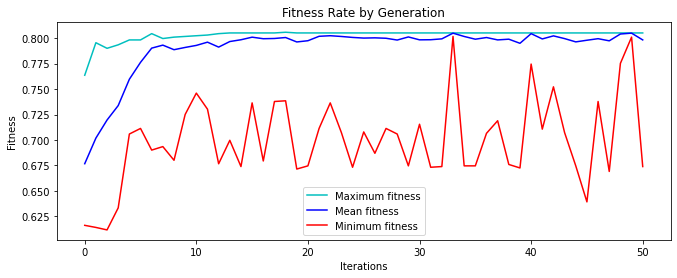

time: 15min 26s


In [ ]:
FeatureSelectionGA(LogisticRegression(), 'Logistic Regression', X_pc2, y_pc2, cv_split=kfold, n_pop=50, n_gen=50)

#####PC4

######ORIGINAL

Logistic Regression
AUC SKLEARN = 0.5839536516853933
AUC       =  0.8805110802567876
ACCURACY  =  0.8937175247992443
Recall    =  0.1765557275541796
Precision =  0.8333333333333333
Nilai G-Means = 0.41601540863857334
CONFISION MATRIX
TN : 1272
TP : 31
FP : 8
FN : 147
PERHITUNGAN MANUAL
ACCURACY =  0.8936899862825789
RECALL|SENSITIVITAS|TPrate =  0.17415730337078653
PRECISION =  0.7948717948717948
BALANCE =  0.41602430612404295
SPECIFICITY|TNrate =  0.99375
FPrate =  0.00625
AUC =  0.5839536516853933
G-MEANS =  0.4160154086385733


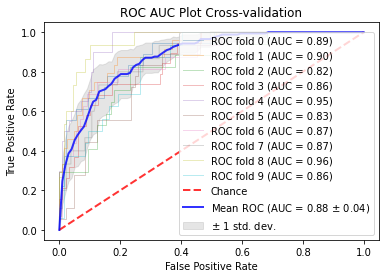

time: 1.22 s


In [ ]:
machinelearning(X_pc4, y_pc4, LogisticRegression(), 'Logistic Regression')

######OPTIMASI GA+B

The number of Features received by the system is : 37
The Shape of Training Data is : (1458, 37) and Target Data is : (1458,)
AUC For All the features : (0.7891678370786517, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min    	max     
0  	50    	0.743337	0.0269485	0.66695	0.789949
1  	24    	0.767424	0.012429 	0.740708	0.789949
2  	26    	0.776451	0.00957658	0.754925	0.795176
3  	35    	0.783428	0.00876298	0.739238	0.796423
4  	29    	0.787968	0.0107901 	0.734011	0.796814
5  	35    	0.788684	0.011293  	0.742122	0.796423
6  	31    	0.793474	0.00350761	0.781039	0.797985
7  	37    	0.792737	0.0136659 	0.702853	0.797985
8  	31    	0.796153	0.00208388	0.786359	0.797985
9  	21    	0.794438	0.00835153	0.756241	0.797985
10 	31    	0.795689	0.00548827	0.767569	0.798376
11 	23    	0.796037	0.00774563	0.754385	0.798376
12 	22    	0.796065	0.00822309	0.75438 	0.798376
13 	28    

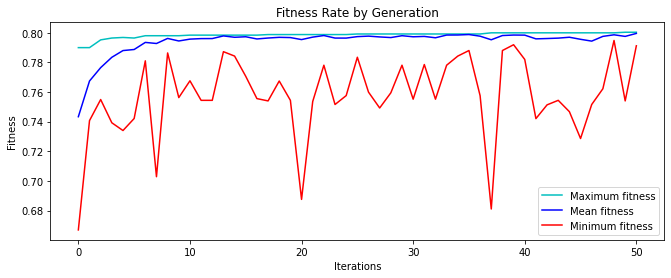

time: 22min 37s


In [ ]:
FeatureSelectionGA(LogisticRegression(), 'Logistic Regression', X_pc4, y_pc4, cv_split=kfold, n_pop=50, n_gen=50)

####NAIVE BAYES

#####CM1

######ORIGINAL

NAIVE BAYES
AUC SKLEARN = 0.6166765147038771
AUC       =  0.7620525278996823
ACCURACY  =  0.8327755102040817
Recall    =  0.3967857142857143
Precision =  0.27222222222222225
Nilai G-Means = 0.5545552054052032
CONFISION MATRIX
TN : 398
TP : 17
FP : 51
FN : 32
PERHITUNGAN MANUAL
ACCURACY =  0.8333333333333334
RECALL|SENSITIVITAS|TPrate =  0.3469387755102041
PRECISION =  0.25
BALANCE =  0.5312833027031351
SPECIFICITY|TNrate =  0.8864142538975501
FPrate =  0.11358574610244988
AUC =  0.6166765147038771
G-MEANS =  0.5545552054052033


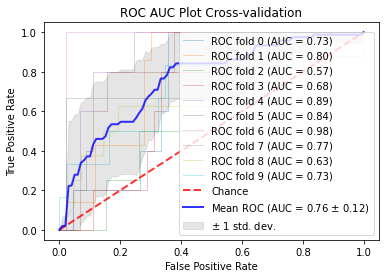

time: 496 ms


In [ ]:
machinelearning(X_cm1, y_cm1, GaussianNB(), 'NAIVE BAYES')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (498, 21) and Target Data is : (498,)
AUC For All the features : (0.6279941820826326, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max    
0  	50    	0.619629	0.0110597	0.598677	0.64413
1  	26    	0.628523	0.00938915	0.605177	0.64413
2  	26    	0.63436 	0.00725743	0.61704 	0.645993
3  	23    	0.638026	0.00667462	0.622244	0.645993
4  	30    	0.640129	0.00691784	0.619267	0.645993
5  	30    	0.641365	0.00729895	0.622244	0.64988 
6  	25    	0.644074	0.00619528	0.619267	0.662311
7  	29    	0.643686	0.00909675	0.619267	0.662311
8  	35    	0.647859	0.00963523	0.628358	0.662311
9  	22    	0.6557  	0.00916077	0.625017	0.662311
10 	38    	0.65751 	0.0096095 	0.628358	0.662311
11 	32    	0.661569	0.00251666	0.64988 	0.662311
12 	24    	0.661124	0.00482223	0.63913 	0.662311
13 	26    	0

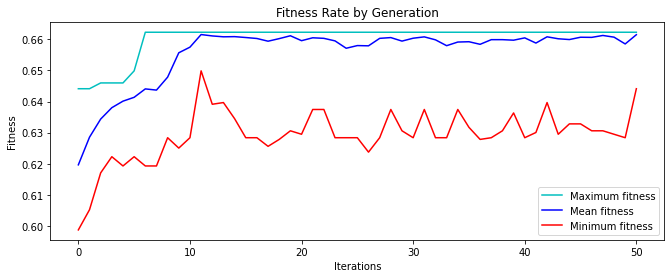

time: 7min 14s


In [ ]:
FeatureSelectionGA(GaussianNB(), 'NAIVE BAYES', X_cm1, y_cm1, cv_split=kfold, n_pop=50, n_gen=50)

#####JM1

######ORIGINAL

NAIVE BAYES
AUC SKLEARN = 0.5754876833829133
AUC       =  0.690654766367921
ACCURACY  =  0.8039522058823529
Recall    =  0.20375400421621026
Precision =  0.4849742354108956
Nilai G-Means = 0.43871543601199775
CONFISION MATRIX
TN : 8320
TP : 427
FP : 457
FN : 1676
PERHITUNGAN MANUAL
ACCURACY =  0.8039522058823529
RECALL|SENSITIVITAS|TPrate =  0.20304327151688065
PRECISION =  0.4830316742081448
BALANCE =  0.4352650649288282
SPECIFICITY|TNrate =  0.9479320952489461
FPrate =  0.05206790475105389
AUC =  0.5754876833829133
G-MEANS =  0.43871543601199775


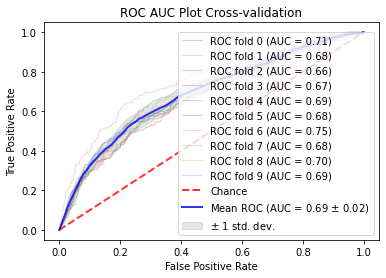

time: 784 ms


In [ ]:
machinelearning(X_jm1, y_jm1, GaussianNB(), 'NAIVE BAYES')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (10880, 21) and Target Data is : (10880,)
AUC + Bagging For All the features : (0.5805497617811998, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std       	min    	max     
0  	50    	0.577064	0.00820711	0.55542	0.591937
1  	21    	0.582876	0.00617999	0.561797	0.596134
2  	33    	0.587243	0.00499078	0.573236	0.59894 
3  	38    	0.590343	0.00370082	0.578754	0.59894 
4  	34    	0.591636	0.00370903	0.578705	0.59894 
5  	26    	0.593521	0.00277492	0.585755	0.600711
6  	35    	0.59508 	0.002875  	0.583928	0.600711
7  	33    	0.596866	0.00291253	0.584871	0.600711
8  	36    	0.598203	0.00260198	0.585988	0.601348
9  	27    	0.598874	0.00288651	0.586565	0.601929
10 	32    	0.599764	0.00200046	0.592313	0.601929
11 	30    	0.600304	0.00270266	0.586582	0.601929
12 	22    	0.601014	0.00175865	0.592947	0.60

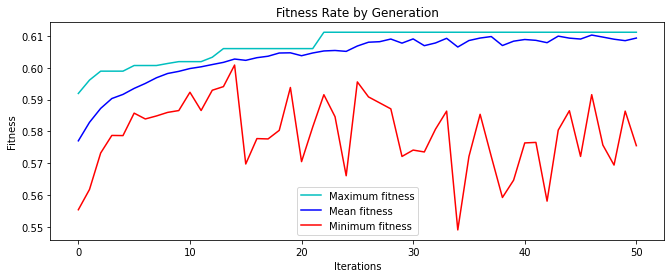

time: 18min 42s


In [ ]:
FeatureSelectionGA(GaussianNB(), 'Naive Bayes', X_jm1, y_jm1, cv_split=kfold, n_pop=50, n_gen=50)

#####KC1

######ORIGINAL

NAIVE BAYES
AUC SKLEARN = 0.6402853810184118
AUC       =  0.7882069470496254
ACCURACY  =  0.8240916271721959
Recall    =  0.3628270965263236
Precision =  0.41354631011991677
Nilai G-Means = 0.5823929672082968
CONFISION MATRIX
TN : 1616
TP : 122
FP : 167
FN : 204
PERHITUNGAN MANUAL
ACCURACY =  0.8240872451398767
RECALL|SENSITIVITAS|TPrate =  0.37423312883435583
PRECISION =  0.42214532871972316
BALANCE =  0.5525869827538792
SPECIFICITY|TNrate =  0.9063376332024677
FPrate =  0.09366236679753225
AUC =  0.6402853810184118
G-MEANS =  0.5823929672082968


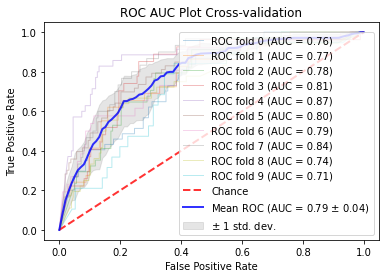

time: 486 ms


In [ ]:
machinelearning(X_kc1, y_kc1, GaussianNB(), 'NAIVE BAYES')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (2109, 21) and Target Data is : (2109,)
AUC For All the features : (0.6498826682815548, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std       	min     	max     
0  	50    	0.647513	0.00746766	0.630522	0.663801
1  	34    	0.652238	0.00482847	0.636525	0.660865
2  	29    	0.656223	0.00372309	0.647227	0.66906 
3  	24    	0.657773	0.00552014	0.642214	0.673661
4  	43    	0.661153	0.00734379	0.642626	0.682137
5  	34    	0.667981	0.0077311 	0.647639	0.685468
6  	32    	0.672666	0.00740175	0.647656	0.685468
7  	38    	0.67707 	0.00606718	0.654072	0.688947
8  	24    	0.680462	0.00444863	0.669323	0.688947
9  	25    	0.682349	0.00696729	0.648595	0.695757
10 	38    	0.686041	0.0044011 	0.674617	0.697423
11 	18    	0.68898 	0.00558545	0.666799	0.702104
12 	32    	0.691847	0.00716546	0.667097	0.702104
13 	3

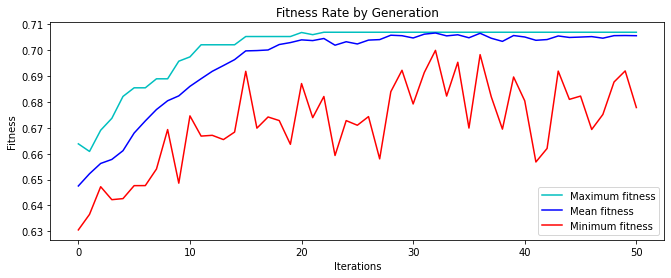

time: 9min 6s


In [ ]:
FeatureSelectionGA(GaussianNB(), 'NAIVE BAYES', X_kc1, y_kc1, cv_split=kfold, n_pop=50, n_gen=50)

#####KC2

######ORIGINAL

NAIVE BAYES
AUC SKLEARN = 0.686037608377435
AUC       =  0.8462943759627585
ACCURACY  =  0.8372641509433961
Recall    =  0.42369782994783006
Precision =  0.6400974025974027
Nilai G-Means = 0.6364310465190348
CONFISION MATRIX
TN : 391
TP : 46
FP : 24
FN : 61
PERHITUNGAN MANUAL
ACCURACY =  0.8371647509578544
RECALL|SENSITIVITAS|TPrate =  0.42990654205607476
PRECISION =  0.6571428571428571
BALANCE =  0.5948142321252166
SPECIFICITY|TNrate =  0.9421686746987952
FPrate =  0.05783132530120482
AUC =  0.686037608377435
G-MEANS =  0.6364310465190348


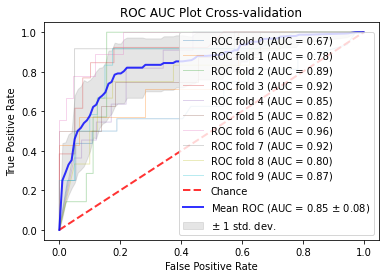

time: 469 ms


In [ ]:
machinelearning(X_kc2, y_kc2, GaussianNB(), 'NAIVE BAYES')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (522, 21) and Target Data is : (522,)
AUC For All the features : (0.7160454903727057, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg    	std     	min     	max     
0  	50    	0.70922	0.011585	0.681218	0.733386
1  	38    	0.720341	0.00896355	0.702173	0.740468
2  	32    	0.72722 	0.00827771	0.710168	0.747405
3  	25    	0.733904	0.00707309	0.716045	0.753282
4  	26    	0.738059	0.0081238 	0.717104	0.754341
5  	40    	0.741939	0.00939018	0.712431	0.753282
6  	31    	0.747341	0.00585274	0.725391	0.753282
7  	42    	0.748763	0.00639636	0.72404 	0.762189
8  	29    	0.750406	0.00550935	0.724333	0.754487
9  	32    	0.752357	0.00439621	0.730976	0.754487
10 	29    	0.75236 	0.00462504	0.727801	0.754487
11 	30    	0.753158	0.00405364	0.734737	0.754487
12 	35    	0.751572	0.00821554	0.711373	0.754487
13 	34    	0.

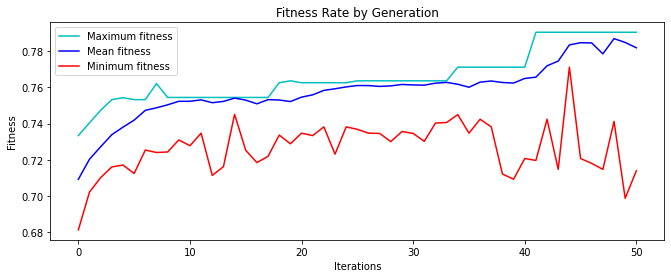

time: 7min 54s


In [ ]:
FeatureSelectionGA(GaussianNB(), 'NAIVE BAYES', X_kc2, y_kc2, cv_split=kfold, n_pop=50, n_gen=50)

#####PC1

######ORIGINAL

NAIVE BAYES
AUC SKLEARN = 0.6159204167925098
AUC       =  0.7080115078347107
ACCURACY  =  0.8890827190827192
Recall    =  0.31147546897546896
Precision =  0.2457070707070707
Nilai G-Means = 0.5279488525788206
CONFISION MATRIX
TN : 963
TP : 23
FP : 69
FN : 54
PERHITUNGAN MANUAL
ACCURACY =  0.8890892696122633
RECALL|SENSITIVITAS|TPrate =  0.2987012987012987
PRECISION =  0.25
BALANCE =  0.5018583583764502
SPECIFICITY|TNrate =  0.9331395348837209
FPrate =  0.06686046511627906
AUC =  0.6159204167925099
G-MEANS =  0.5279488525788206


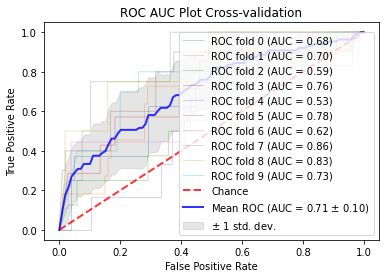

time: 445 ms


In [ ]:
machinelearning(X_pc1, y_pc1, GaussianNB(), 'NAIVE BAYES')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (1109, 21) and Target Data is : (1109,)
AUC For All the features : (0.6158260344306856, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.609499	0.0129862	0.575122	0.629782
1  	26    	0.620009	0.00708323	0.603808	0.629782
2  	18    	0.624647	0.00524655	0.599057	0.629782
3  	22    	0.626872	0.00284887	0.621351	0.630267
4  	36    	0.628119	0.00241352	0.620866	0.63104 
5  	28    	0.629164	0.001955  	0.620382	0.63104 
6  	32    	0.628471	0.00566417	0.590431	0.63104 
7  	23    	0.628981	0.00459413	0.599057	0.631236
8  	37    	0.630043	0.00205835	0.621835	0.634432
9  	33    	0.629765	0.00598547	0.589462	0.634432
10 	39    	0.631283	0.00133082	0.624742	0.634432
11 	31    	0.630564	0.00510542	0.597409	0.634627
12 	27    	0.629267	0.00930569	0.584422	0.634916
13 	35 

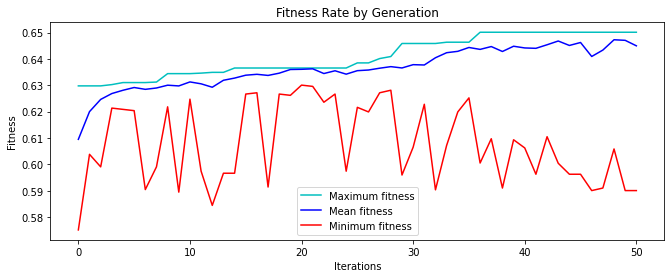

time: 8min 1s


In [ ]:
FeatureSelectionGA(GaussianNB(), 'NAIVE BAYES', X_pc1, y_pc1, cv_split=kfold, n_pop=50, n_gen=50)

#####PC2

######ORIGINAL

NAIVE BAYES
AUC SKLEARN = 0.520661865569273
AUC       =  0.7667872495783454
ACCURACY  =  0.8994954954954956
Recall    =  0.08333333333333333
Precision =  0.028846153846153844
Nilai G-Means = 0.3384382756017975
CONFISION MATRIX
TN : 668
TP : 2
FP : 61
FN : 14
PERHITUNGAN MANUAL
ACCURACY =  0.8993288590604027
RECALL|SENSITIVITAS|TPrate =  0.125
PRECISION =  0.031746031746031744
BALANCE =  0.3784588839141154
SPECIFICITY|TNrate =  0.9163237311385459
FPrate =  0.08367626886145405
AUC =  0.520661865569273
G-MEANS =  0.3384382756017975


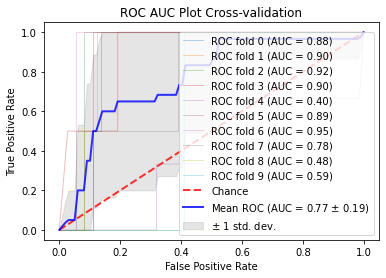

time: 473 ms


In [ ]:
machinelearning(X_pc2, y_pc2, GaussianNB(), 'NAIVE BAYES')

######OPTIMASI GA+B

The number of Features received by the system is : 36
The Shape of Training Data is : (745, 36) and Target Data is : (745,)
AUC For All the features : (0.6553497942386831, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std     	min     	max     
0  	50    	0.647611	0.018827	0.575703	0.677298
1  	28    	0.658017	0.0114787	0.622042	0.677298
2  	32    	0.665213	0.00809548	0.636445	0.677298
3  	29    	0.669   	0.0104426 	0.628215	0.705804
4  	32    	0.672269	0.0119268 	0.636445	0.70649 
5  	22    	0.675482	0.0114692 	0.640561	0.70649 
6  	33    	0.678259	0.0151406 	0.616855	0.70649 
7  	35    	0.687352	0.0174301 	0.635074	0.710605
8  	21    	0.698134	0.0135379 	0.653978	0.711291
9  	33    	0.704161	0.0102762 	0.670439	0.711291
10 	24    	0.704929	0.010956  	0.671811	0.711291
11 	25    	0.705868	0.0111539 	0.669753	0.711291
12 	27    	0.710098	0.00225738	0.700317	0.711977
13 	14    	0

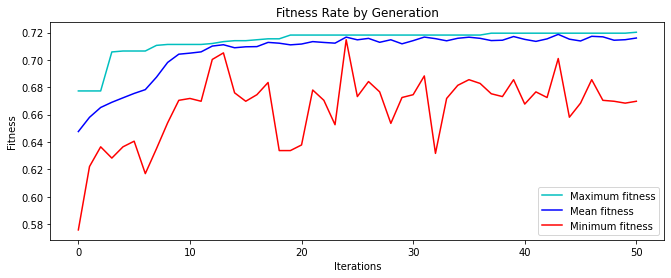

time: 7min 29s


In [ ]:
FeatureSelectionGA(GaussianNB(), 'NAIVE BAYES', X_pc2, y_pc2, cv_split=kfold, n_pop=50, n_gen=50)

#####PC4

######ORIGINAL

NAIVE BAYES
AUC SKLEARN = 0.6842608848314606
AUC       =  0.8453737834420986
ACCURACY  =  0.8744922059518186
Recall    =  0.4367195562435501
Precision =  0.4824054036330251
Nilai G-Means = 0.6362954030068427
CONFISION MATRIX
TN : 1198
TP : 77
FP : 82
FN : 101
PERHITUNGAN MANUAL
ACCURACY =  0.8744855967078189
RECALL|SENSITIVITAS|TPrate =  0.43258426966292135
PRECISION =  0.48427672955974843
BALANCE =  0.5962274062419477
SPECIFICITY|TNrate =  0.9359375
FPrate =  0.0640625
AUC =  0.6842608848314607
G-MEANS =  0.6362954030068427


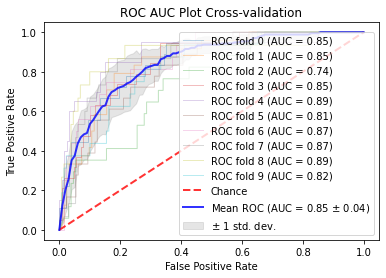

time: 500 ms


In [ ]:
machinelearning(X_pc4, y_pc4, GaussianNB(), 'NAIVE BAYES')

######OPTIMASI GA+B

The number of Features received by the system is : 37
The Shape of Training Data is : (1458, 37) and Target Data is : (1458,)
AUC For All the features : (0.6990519662921348, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.687364	0.0337139	0.580851	0.746045
1  	29    	0.716461	0.026513 	0.637755	0.767328
2  	29    	0.736027	0.0188075	0.693825	0.777374
3  	31    	0.747086	0.0139004	0.715331	0.777374
4  	31    	0.763709	0.0112768	0.738084	0.780034
5  	32    	0.767856	0.0122196	0.728766	0.782992
6  	29    	0.771567	0.0119945	0.726791	0.784164
7  	32    	0.774938	0.013877 	0.716038	0.786192
8  	34    	0.777527	0.00902576	0.738176	0.786192
9  	19    	0.780761	0.00694469	0.752317	0.786192
10 	33    	0.782911	0.00564239	0.759981	0.786192
11 	36    	0.783371	0.0050202 	0.765691	0.786192
12 	31    	0.782477	0.0101514 	0.724706	0.786192
13 	35    	0.7

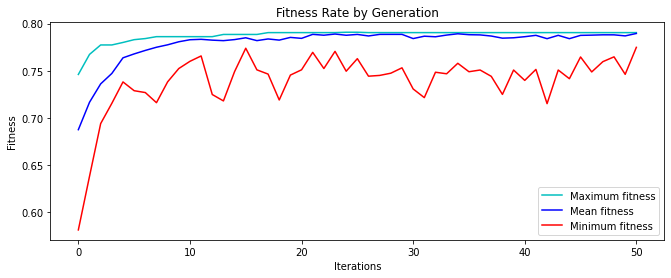

time: 8min 57s


In [ ]:
FeatureSelectionGA(GaussianNB(), 'NAIVE BAYES', X_pc4, y_pc4, cv_split=kfold, n_pop=50, n_gen=50)

####SUPPORT VECTOR MACHINE

#####CM1

######ORIGINAL

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.49888641425389757
AUC       =  0.6485845367336205
ACCURACY  =  0.8993877551020409
Recall    =  0.0
Precision =  0.0
Nilai G-Means = 0.0
CONFISION MATRIX
TN : 448
TP : 0
FP : 1
FN : 49
PERHITUNGAN MANUAL
ACCURACY =  0.8995983935742972
RECALL|SENSITIVITAS|TPrate =  0.0
PRECISION =  0.0
BALANCE =  0.2928914650872698
SPECIFICITY|TNrate =  0.9977728285077951
FPrate =  0.0022271714922048997
AUC =  0.49888641425389757
G-MEANS =  0.0


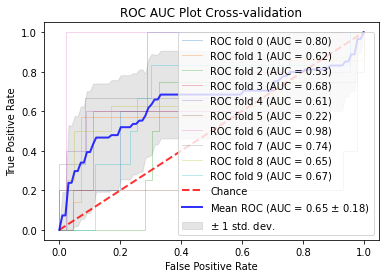

time: 629 ms


In [ ]:
machinelearning(X_cm1, y_cm1, SVC(), 'SUPPORT VECTOR MACHINE')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (498, 21) and Target Data is : (498,)
AUC For All the features : (0.6609926821508113, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.652184	0.0209767	0.616654	0.707559
1  	30    	0.668776	0.0205687	0.634085	0.707559
2  	29    	0.683812	0.0176354	0.653198	0.707559
3  	31    	0.696201	0.0130162	0.655425	0.718876
4  	37    	0.698026	0.014793 	0.651902	0.718876
5  	34    	0.701318	0.0152874	0.659879	0.733535
6  	27    	0.704305	0.0156769	0.65672 	0.743921
7  	24    	0.711637	0.014068 	0.661174	0.743921
8  	34    	0.71938 	0.018404 	0.678242	0.751898
9  	33    	0.720111	0.0240856	0.63688 	0.751898
10 	30    	0.735646	0.0217981	0.643743	0.751898
11 	28    	0.741979	0.0202233	0.640585	0.751898
12 	27    	0.747523	0.0157444	0.657652	0.751898
13 	33    	0.736644	0

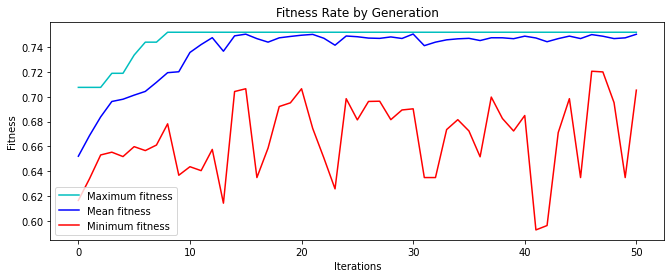

time: 10min 28s


In [ ]:
FeatureSelectionGA(SVC(), 'Support Vector Machine', X_cm1, y_cm1, cv_split=kfold, n_pop=50, n_gen=50)

#####JM1

######ORIGINAL

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.5304793344425525
AUC       =  0.6221553795975516
ACCURACY  =  0.8121323529411765
Recall    =  0.07193354541965119
Precision =  0.6289592847239907
Nilai G-Means = 0.2656824433006241
CONFISION MATRIX
TN : 8686
TP : 150
FP : 91
FN : 1953
PERHITUNGAN MANUAL
ACCURACY =  0.8121323529411765
RECALL|SENSITIVITAS|TPrate =  0.07132667617689016
PRECISION =  0.6224066390041494
BALANCE =  0.34328787206422584
SPECIFICITY|TNrate =  0.9896319927082147
FPrate =  0.010368007291785348
AUC =  0.5304793344425525
G-MEANS =  0.2656824433006241


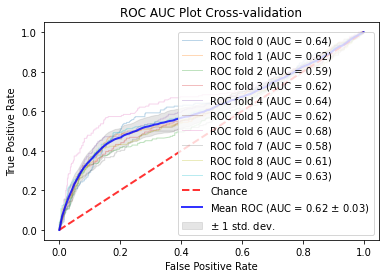

time: 2min 4s


In [ ]:
machinelearning(X_jm1, y_jm1, SVC(), 'SUPPORT VECTOR MACHINE')

######OPTIMASI GA+B

In [ ]:
FeatureSelectionGA(SVC(), 'Support Vector Machine', X_jm1, y_jm1, cv_split=kfold, n_pop=50, n_gen=50)

#####KC1

######ORIGINAL

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.5670210130441216
AUC       =  0.6661092165180782
ACCURACY  =  0.8549266531257054
Recall    =  0.1462645351316942
Precision =  0.5897191697191697
Nilai G-Means = 0.3845283486700453
CONFISION MATRIX
TN : 1754
TP : 49
FP : 29
FN : 277
PERHITUNGAN MANUAL
ACCURACY =  0.8549075391180654
RECALL|SENSITIVITAS|TPrate =  0.15030674846625766
PRECISION =  0.6282051282051282
BALANCE =  0.3990660756389197
SPECIFICITY|TNrate =  0.9837352776219854
FPrate =  0.016264722378014584
AUC =  0.5670210130441216
G-MEANS =  0.3845283486700453


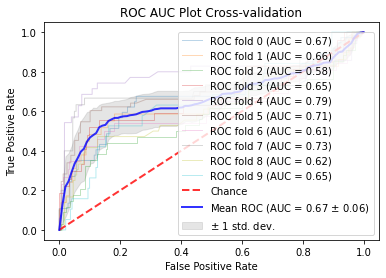

time: 3.63 s


In [ ]:
machinelearning(X_kc1, y_kc1, SVC(), 'SUPPORT VECTOR MACHINE')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (2109, 21) and Target Data is : (2109,)
AUC For All the features : (0.7193234329678043, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std       	min    	max     
0  	50    	0.716544	0.00450103	0.70445	0.726941
1  	32    	0.719541	0.00289054	0.710899	0.726546
2  	37    	0.720664	0.00303799	0.714179	0.730884
3  	24    	0.721857	0.00478022	0.701943	0.730884
4  	30    	0.723603	0.00389125	0.70928 	0.731015
5  	32    	0.725217	0.00341685	0.716782	0.731015
6  	35    	0.726499	0.00297505	0.718448	0.730884
7  	29    	0.727408	0.00422812	0.713984	0.730884
8  	37    	0.728615	0.00419655	0.707597	0.731033
9  	29    	0.730226	0.00201202	0.721452	0.732269
10 	33    	0.730208	0.00259601	0.716571	0.731033
11 	27    	0.730371	0.00234284	0.720113	0.732864
12 	30    	0.730477	0.00328223	0.71181 	0.732847
13 	32 

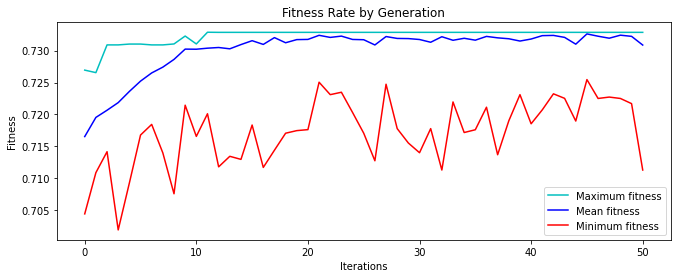

time: 49min 23s


In [ ]:
FeatureSelectionGA(SVC(), 'Support Vector Machine', X_kc1, y_kc1, cv_split=kfold, n_pop=50, n_gen=50)

#####KC2

######ORIGINAL

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.6489471906316856
AUC       =  0.7872652703475282
ACCURACY  =  0.833345428156749
Recall    =  0.3417533855033855
Precision =  0.6969047619047619
Nilai G-Means = 0.5687504601437685
CONFISION MATRIX
TN : 399
TP : 36
FP : 16
FN : 71
PERHITUNGAN MANUAL
ACCURACY =  0.8333333333333334
RECALL|SENSITIVITAS|TPrate =  0.3364485981308411
PRECISION =  0.6923076923076923
BALANCE =  0.5300069731576915
SPECIFICITY|TNrate =  0.9614457831325302
FPrate =  0.03855421686746988
AUC =  0.6489471906316856
G-MEANS =  0.5687504601437685


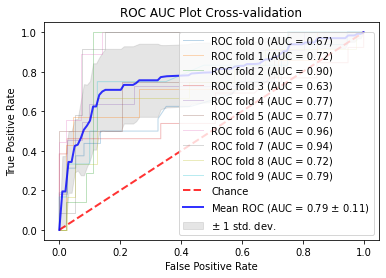

time: 681 ms


In [ ]:
machinelearning(X_kc2, y_kc2, SVC(), 'SUPPORT VECTOR MACHINE')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (522, 21) and Target Data is : (522,)
AUC For All the features : (0.7712757572345457, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std       	min     	max     
0  	50    	0.773322	0.00497314	0.761311	0.785148
1  	31    	0.777039	0.00373307	0.769012	0.785148
2  	35    	0.779596	0.00463105	0.767661	0.786499
3  	20    	0.781488	0.00612401	0.759374	0.787411
4  	40    	0.784128	0.00404933	0.773539	0.798547
5  	30    	0.782679	0.0073323 	0.760579	0.798547
6  	20    	0.785587	0.00618563	0.759374	0.798547
7  	32    	0.785988	0.00667873	0.765252	0.798547
8  	28    	0.78808 	0.00725243	0.76854 	0.798547
9  	33    	0.792304	0.00613964	0.775949	0.799752
10 	30    	0.793704	0.00702319	0.771715	0.802162
11 	29    	0.795421	0.0063749 	0.761896	0.802162
12 	38    	0.795313	0.0068328 	0.769012	0.802162
13 	26 

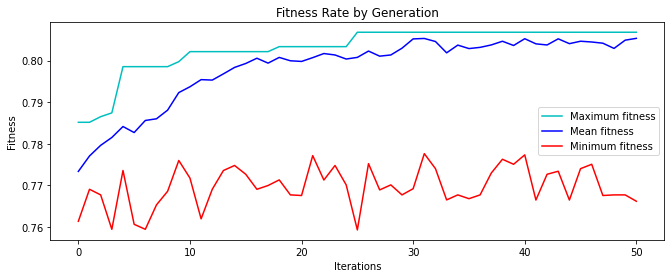

time: 12min 32s


In [ ]:
FeatureSelectionGA(SVC(), 'Support Vector Machine', X_kc2, y_kc2, cv_split=kfold, n_pop=50, n_gen=50)

#####PC1

######ORIGINAL

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.537992046712977
AUC       =  0.7227166255141785
ACCURACY  =  0.9341687141687143
Recall    =  0.0925
Precision =  0.275
Nilai G-Means = 0.27887464234519277
CONFISION MATRIX
TN : 1030
TP : 6
FP : 2
FN : 71
PERHITUNGAN MANUAL
ACCURACY =  0.9341749323715058
RECALL|SENSITIVITAS|TPrate =  0.07792207792207792
PRECISION =  0.75
BALANCE =  0.3479910084333784
SPECIFICITY|TNrate =  0.998062015503876
FPrate =  0.001937984496124031
AUC =  0.537992046712977
G-MEANS =  0.2788746423451927


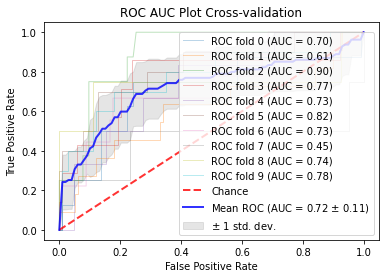

time: 1.07 s


In [ ]:
machinelearning(X_pc1, y_pc1, SVC(), 'SUPPORT VECTOR MACHINE')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (1109, 21) and Target Data is : (1109,)
AUC For All the features : (0.6408373603141044, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.641574	0.0134311	0.618255	0.689589
1  	35    	0.649972	0.0116904	0.627171	0.690759
2  	34    	0.654495	0.0104412	0.635602	0.682322
3  	32    	0.663495	0.010051 	0.644034	0.694145
4  	29    	0.668509	0.0106683	0.65266 	0.700059
5  	34    	0.671427	0.012374 	0.624459	0.700059
6  	29    	0.675924	0.0134274	0.641517	0.700059
7  	34    	0.680495	0.014045 	0.645682	0.700059
8  	29    	0.686796	0.0125278	0.651691	0.702387
9  	24    	0.693785	0.0121699	0.641806	0.710045
10 	27    	0.699291	0.00574866	0.673601	0.710045
11 	31    	0.699636	0.00968591	0.662262	0.710045
12 	31    	0.701623	0.00858454	0.665459	0.710045
13 	31    	0.703

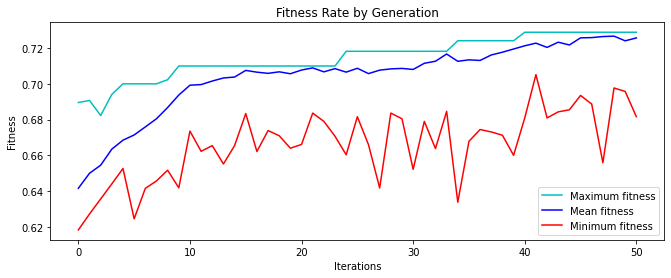

time: 12min 20s


In [ ]:
FeatureSelectionGA(SVC(), 'Support Vector Machine', X_pc1, y_pc1, cv_split=kfold, n_pop=50, n_gen=50)

#####PC2

######ORIGINAL

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.5
AUC       =  0.8166609246232535
ACCURACY  =  0.9785585585585584
Recall    =  0.0
Precision =  0.0
Nilai G-Means = 0.0
CONFISION MATRIX
TN : 729
TP : 0
FP : 0
FN : 16
PERHITUNGAN MANUAL
ACCURACY =  0.978523489932886
RECALL|SENSITIVITAS|TPrate =  0.0
PRECISION =  nan
BALANCE =  0.29289321881345254
SPECIFICITY|TNrate =  1.0
FPrate =  0.0
AUC =  0.5
G-MEANS =  0.0


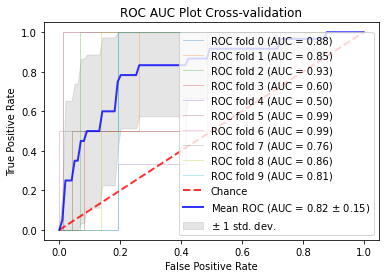

time: 622 ms


In [ ]:
machinelearning(X_pc2, y_pc2, SVC(), 'SUPPORT VECTOR MACHINE')

######OPTIMASI GA+B

The number of Features received by the system is : 36
The Shape of Training Data is : (745, 36) and Target Data is : (745,)
AUC For All the features : (0.5664866255144033, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.620827	0.0530034	0.521819	0.773191
1  	28    	0.660847	0.0510907	0.560314	0.773877
2  	40    	0.706794	0.0483027	0.626543	0.78828 
3  	29    	0.749963	0.0419814	0.635931	0.812671
4  	32    	0.768293	0.0361627	0.650549	0.82296 
5  	25    	0.775195	0.0357257	0.611154	0.82296 
6  	31    	0.793446	0.0328935	0.646133	0.839806
7  	32    	0.799453	0.0286523	0.688657	0.84255 
8  	22    	0.810895	0.0268589	0.685614	0.83912 
9  	32    	0.81662 	0.0202559	0.73684 	0.83912 
10 	29    	0.812107	0.0442105	0.608325	0.839806
11 	27    	0.821824	0.0393354	0.637517	0.839806
12 	26    	0.831061	0.0231652	0.697359	0.84255 
13 	27    	0.827594	0

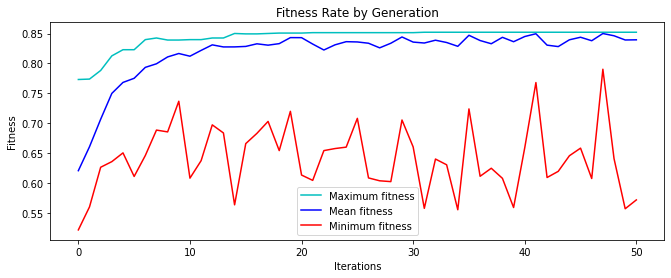

time: 9min 20s


In [ ]:
FeatureSelectionGA(SVC(), 'Support Vector Machine', X_pc2, y_pc2, cv_split=kfold, n_pop=50, n_gen=50)

#####PC4

######ORIGINAL

SUPPORT VECTOR MACHINE
AUC SKLEARN = 0.5750614466292134
AUC       =  0.8901586604190108
ACCURACY  =  0.8950873878129428
Recall    =  0.15286936704506365
Precision =  0.9666666666666666
Nilai G-Means = 0.389163699272505
CONFISION MATRIX
TN : 1278
TP : 27
FP : 2
FN : 151
PERHITUNGAN MANUAL
ACCURACY =  0.8950617283950617
RECALL|SENSITIVITAS|TPrate =  0.15168539325842698
PRECISION =  0.9310344827586207
BALANCE =  0.4001499714856389
SPECIFICITY|TNrate =  0.9984375
FPrate =  0.0015625
AUC =  0.5750614466292135
G-MEANS =  0.38916369927250494


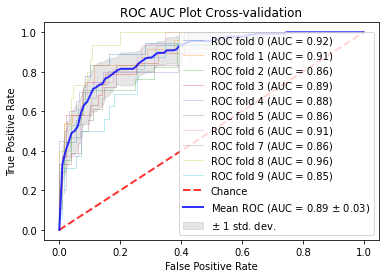

time: 1.99 s


In [ ]:
machinelearning(X_pc4, y_pc4, SVC(), 'SUPPORT VECTOR MACHINE')

######OPTIMASI GA+B

The number of Features received by the system is : 37
The Shape of Training Data is : (1458, 37) and Target Data is : (1458,)
AUC For All the features : (0.7765932233146068, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.756114	0.0217022	0.709919	0.795492
1  	29    	0.772035	0.0153724	0.738294	0.795492
2  	31    	0.783103	0.0123138	0.735951	0.804235
3  	19    	0.791453	0.0071878	0.75736 	0.804235
4  	29    	0.794929	0.00443977	0.78448 	0.804701
5  	32    	0.797766	0.00547031	0.774583	0.806579
6  	23    	0.800539	0.00441017	0.788237	0.806579
7  	20    	0.803766	0.00231023	0.796664	0.806579
8  	36    	0.802271	0.00771693	0.76415 	0.806579
9  	32    	0.804182	0.00453925	0.779736	0.806579
10 	29    	0.805916	0.00198437	0.793149	0.806579
11 	30    	0.805228	0.00310451	0.795883	0.806579
12 	31    	0.806034	0.00172416	0.797911	0.806579
13 	37    

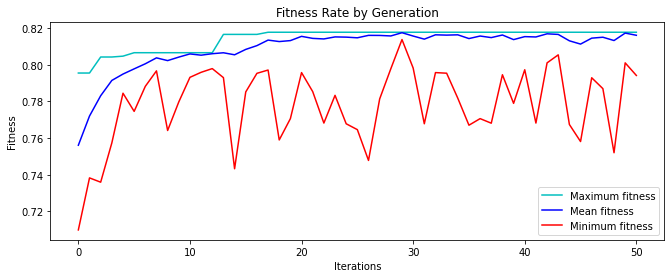

time: 23min


In [ ]:
FeatureSelectionGA(SVC(), 'Support Vector Machine', X_pc4, y_pc4, cv_split=kfold, n_pop=50, n_gen=50)

####KNN

#####CM1

######ORIGINAL

k-NN
AUC SKLEARN = 0.5092723058042816
AUC       =  0.6799602293046322
ACCURACY  =  0.885265306122449
Recall    =  0.04583333333333333
Precision =  0.15
Nilai G-Means = 0.1997680578620045
CONFISION MATRIX
TN : 439
TP : 2
FP : 10
FN : 47
PERHITUNGAN MANUAL
ACCURACY =  0.8855421686746988
RECALL|SENSITIVITAS|TPrate =  0.04081632653061224
PRECISION =  0.16666666666666666
BALANCE =  0.32157190921373324
SPECIFICITY|TNrate =  0.977728285077951
FPrate =  0.022271714922048998
AUC =  0.5092723058042816
G-MEANS =  0.1997680578620045


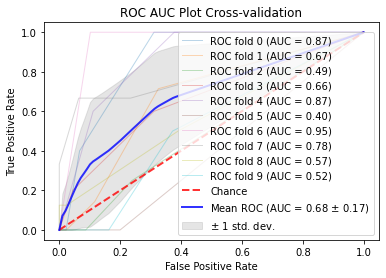

time: 565 ms


In [ ]:
machinelearning(X_cm1, y_cm1, KNeighborsClassifier(), 'k-NN')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (498, 21) and Target Data is : (498,)
AUC For All the features : (0.671174037543748, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.676752	0.0222737	0.627017	0.723126
1  	27    	0.694784	0.0190807	0.657447	0.726467
2  	30    	0.706815	0.0175199	0.662834	0.743534
3  	34    	0.706866	0.0197241	0.654652	0.731103
4  	40    	0.709048	0.0191465	0.659856	0.738898
5  	22    	0.71533 	0.017024 	0.647607	0.738898
6  	28    	0.719074	0.0172431	0.669697	0.738898
7  	30    	0.7225  	0.0167421	0.66747 	0.738898
8  	27    	0.730496	0.0126458	0.662084	0.738898
9  	36    	0.735469	0.00632012	0.715149	0.738898
10 	39    	0.736171	0.00801572	0.693628	0.738898
11 	34    	0.735915	0.00916575	0.689173	0.738898
12 	33    	0.735157	0.01315   	0.674697	0.738898
13 	26    	0.73532

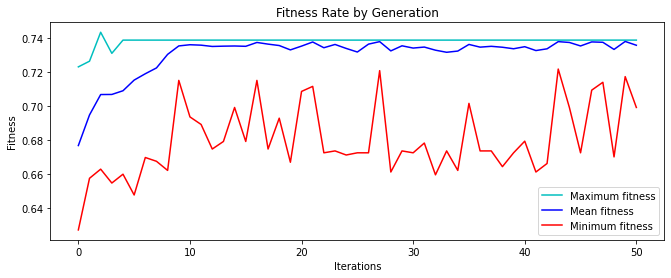

time: 9min 7s


In [ ]:
FeatureSelectionGA(KNeighborsClassifier(), 'KNN', X_cm1, y_cm1, cv_split=kfold, n_pop=50, n_gen=50)

#####JM1

######ORIGINAL

k-NN
AUC SKLEARN = 0.588080277901798
AUC       =  0.6724132798449961
ACCURACY  =  0.7939338235294119
Recall    =  0.2530356966129898
Precision =  0.44463424257538475
Nilai G-Means = 0.48293052993687186
CONFISION MATRIX
TN : 8107
TP : 531
FP : 670
FN : 1572
PERHITUNGAN MANUAL
ACCURACY =  0.7939338235294118
RECALL|SENSITIVITAS|TPrate =  0.2524964336661912
PRECISION =  0.4421315570358035
BALANCE =  0.4686861812775731
SPECIFICITY|TNrate =  0.9236641221374046
FPrate =  0.07633587786259542
AUC =  0.588080277901798
G-MEANS =  0.48293052993687186


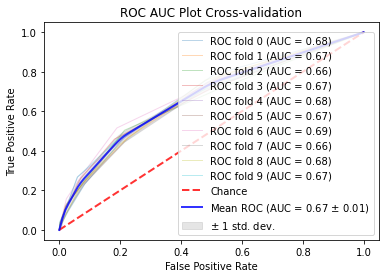

time: 5.36 s


In [ ]:
machinelearning(X_jm1, y_jm1, KNeighborsClassifier(), 'k-NN')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (10880, 21) and Target Data is : (10880,)
AUC + Bagging For All the features : (0.6487595020292252, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std       	min     	max     
0  	50    	0.644323	0.00746498	0.626038	0.657692
1  	29    	0.649573	0.00575907	0.634913	0.664803
2  	30    	0.653653	0.00565092	0.637156	0.664803
3  	24    	0.657071	0.00372076	0.648174	0.668233
4  	34    	0.657713	0.00563403	0.640125	0.668233
5  	36    	0.659694	0.00473352	0.643636	0.668233
6  	34    	0.661295	0.00377663	0.65105 	0.66874 
7  	31    	0.663572	0.00405479	0.654233	0.669823
8  	35    	0.665216	0.00418254	0.654477	0.669823
9  	23    	0.666764	0.00399089	0.652227	0.669823
10 	33    	0.666715	0.0044774 	0.649286	0.669823
11 	38    	0.666725	0.00501693	0.649358	0.669823
12 	34    	0.668048	0.00354746	0.652283	0.

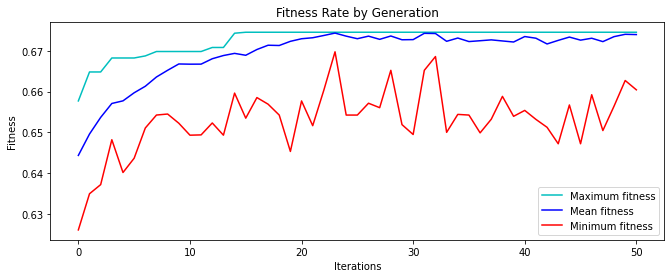

time: 1h 29min 10s


In [ ]:
FeatureSelectionGA(KNeighborsClassifier(), 'KNN', X_jm1, y_jm1, cv_split=kfold, n_pop=50, n_gen=50)

#####KC1

######ORIGINAL

k-NN
AUC SKLEARN = 0.6172680634072993
AUC       =  0.728583309689274
ACCURACY  =  0.8487564883773414
Recall    =  0.28103055711885183
Precision =  0.5088386909787838
Nilai G-Means = 0.5184158665431874
CONFISION MATRIX
TN : 1698
TP : 92
FP : 85
FN : 234
PERHITUNGAN MANUAL
ACCURACY =  0.8487434803224277
RECALL|SENSITIVITAS|TPrate =  0.2822085889570552
PRECISION =  0.519774011299435
BALANCE =  0.4913266404588571
SPECIFICITY|TNrate =  0.9523275378575434
FPrate =  0.04767246214245653
AUC =  0.6172680634072993
G-MEANS =  0.5184158665431874


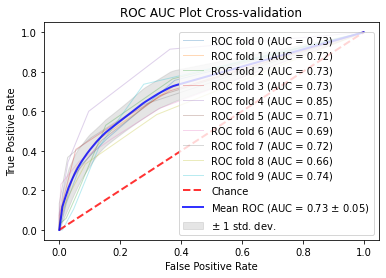

time: 902 ms


In [ ]:
machinelearning(X_kc1, y_kc1, KNeighborsClassifier(), 'k-NN')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (2109, 21) and Target Data is : (2109,)
AUC For All the features : (0.7233526248240885, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std       	min     	max     
0  	50    	0.713047	0.00957209	0.692661	0.738341
1  	31    	0.719855	0.00717335	0.703019	0.734667
2  	27    	0.723419	0.00501063	0.71011 	0.736035
3  	33    	0.725329	0.0048745 	0.711758	0.736035
4  	29    	0.726205	0.00498995	0.712319	0.736035
5  	27    	0.728107	0.00639733	0.707998	0.736035
6  	28    	0.729185	0.00748704	0.706991	0.737866
7  	34    	0.728351	0.00751449	0.709795	0.737866
8  	33    	0.730309	0.00702735	0.712302	0.737866
9  	25    	0.733253	0.00522038	0.713721	0.737866
10 	25    	0.73483 	0.0038321 	0.717218	0.742004
11 	30    	0.73629 	0.00305639	0.721864	0.742004
12 	32    	0.73705 	0.00482011	0.716754	0.742004
13 	3

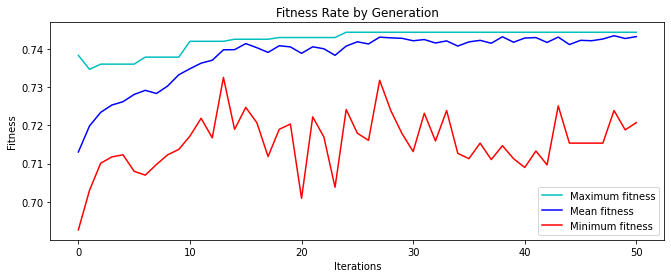

time: 14min 15s


In [ ]:
FeatureSelectionGA(KNeighborsClassifier(), 'KNN', X_kc1, y_kc1, cv_split=kfold, n_pop=50, n_gen=50)

#####KC2

######ORIGINAL

k-NN
AUC SKLEARN = 0.7115189730886161
AUC       =  0.7861689401416533
ACCURACY  =  0.8391872278664732
Recall    =  0.5271242646242646
Precision =  0.6614285714285714
Nilai G-Means = 0.6778792844510042
CONFISION MATRIX
TN : 385
TP : 53
FP : 30
FN : 54
PERHITUNGAN MANUAL
ACCURACY =  0.8390804597701149
RECALL|SENSITIVITAS|TPrate =  0.4953271028037383
PRECISION =  0.6385542168674698
BALANCE =  0.6395000309776435
SPECIFICITY|TNrate =  0.927710843373494
FPrate =  0.07228915662650602
AUC =  0.7115189730886161
G-MEANS =  0.6778792844510042


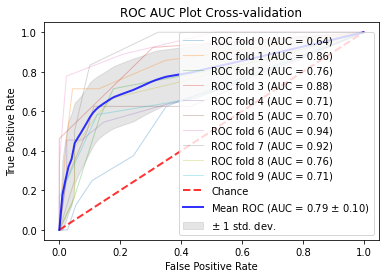

time: 527 ms


In [ ]:
machinelearning(X_kc2, y_kc2, KNeighborsClassifier(), 'k-NN')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (522, 21) and Target Data is : (522,)
AUC For All the features : (0.7678076793153925, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.760188	0.0133889	0.728634	0.786499
1  	25    	0.76839 	0.0107641	0.743092	0.792377
2  	18    	0.774323	0.00807457	0.751379	0.794347
3  	26    	0.777868	0.00772274	0.759374	0.794347
4  	35    	0.780152	0.0100342 	0.75094 	0.798255
5  	33    	0.786552	0.00972899	0.751526	0.813332
6  	30    	0.790338	0.00993852	0.756964	0.813332
7  	27    	0.795594	0.00948452	0.762696	0.813332
8  	26    	0.801037	0.00937185	0.776714	0.813332
9  	33    	0.807692	0.00833123	0.78409 	0.818151
10 	32    	0.810911	0.00669842	0.789821	0.818151
11 	25    	0.812385	0.00948662	0.755613	0.818151
12 	25    	0.810527	0.0130212 	0.751379	0.818151
13 	27    

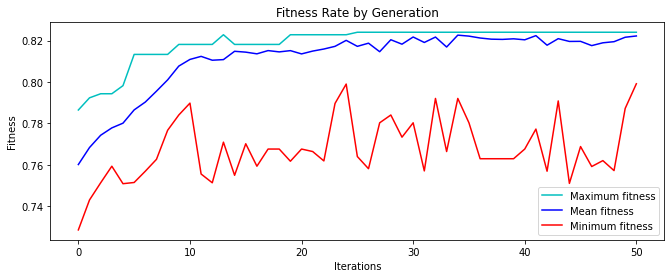

time: 9min 7s


In [ ]:
FeatureSelectionGA(KNeighborsClassifier(), 'KNN', X_kc2, y_kc2, cv_split=kfold, n_pop=50, n_gen=50)

#####PC1

######ORIGINAL

k-NN
AUC SKLEARN = 0.5862591865498842
AUC       =  0.75549885073251
ACCURACY  =  0.9232923832923834
Recall    =  0.21016233766233766
Precision =  0.38166666666666665
Nilai G-Means = 0.43642136308993923
CONFISION MATRIX
TN : 1009
TP : 15
FP : 23
FN : 62
PERHITUNGAN MANUAL
ACCURACY =  0.9233543733092876
RECALL|SENSITIVITAS|TPrate =  0.19480519480519481
PRECISION =  0.39473684210526316
BALANCE =  0.43042323751120704
SPECIFICITY|TNrate =  0.9777131782945736
FPrate =  0.022286821705426358
AUC =  0.5862591865498842
G-MEANS =  0.43642136308993923


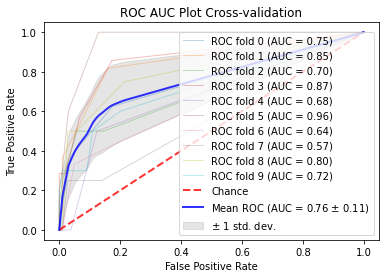

time: 677 ms


In [ ]:
machinelearning(X_pc1, y_pc1, KNeighborsClassifier(), 'k-NN')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (1109, 21) and Target Data is : (1109,)
AUC For All the features : (0.7803156146179401, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.724711	0.0262898	0.668963	0.786419
1  	29    	0.747328	0.0231798	0.708988	0.787583
2  	29    	0.765014	0.0201536	0.696485	0.788068
3  	33    	0.777004	0.0108897	0.7556  	0.796984
4  	28    	0.783745	0.0064556	0.754342	0.796984
5  	33    	0.78264 	0.01262  	0.737189	0.796984
6  	35    	0.784424	0.01342  	0.733408	0.796984
7  	37    	0.788531	0.00929111	0.747458	0.797273
8  	30    	0.792139	0.00696032	0.762094	0.797273
9  	28    	0.794676	0.00226389	0.784481	0.798726
10 	31    	0.795502	0.00252067	0.785645	0.798726
11 	29    	0.795649	0.00530106	0.771689	0.798726
12 	31    	0.793738	0.0109928 	0.752498	0.798726
13 	32    	0.

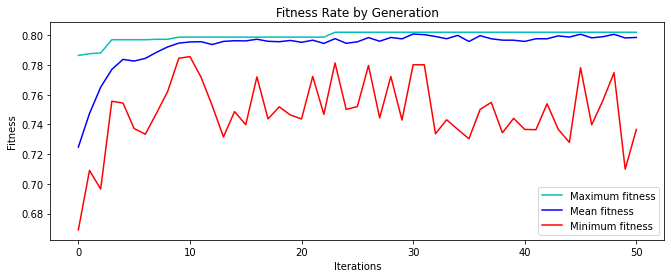

time: 10min 14s


In [ ]:
FeatureSelectionGA(KNeighborsClassifier(), 'KNN', X_pc1, y_pc1, cv_split=kfold, n_pop=50, n_gen=50)

#####PC2

######ORIGINAL

k-NN
AUC SKLEARN = 0.5
AUC       =  0.5588687574560863
ACCURACY  =  0.9785585585585584
Recall    =  0.0
Precision =  0.0
Nilai G-Means = 0.0
CONFISION MATRIX
TN : 729
TP : 0
FP : 0
FN : 16
PERHITUNGAN MANUAL
ACCURACY =  0.978523489932886
RECALL|SENSITIVITAS|TPrate =  0.0
PRECISION =  nan
BALANCE =  0.29289321881345254
SPECIFICITY|TNrate =  1.0
FPrate =  0.0
AUC =  0.5
G-MEANS =  0.0


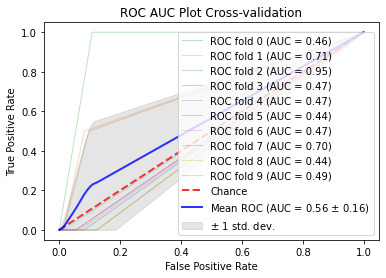

time: 649 ms


In [ ]:
machinelearning(X_pc2, y_pc2, KNeighborsClassifier(), 'k-NN')

######OPTIMASI GA+B

The number of Features received by the system is : 36
The Shape of Training Data is : (745, 36) and Target Data is : (745,)
AUC For All the features : (0.6283864883401921, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg    	std      	min     	max     
0  	50    	0.65849	0.0602779	0.482039	0.772205
1  	23    	0.698076	0.0408318	0.577932	0.771905
2  	27    	0.717895	0.0408203	0.590964	0.771905
3  	31    	0.743896	0.0291111	0.633488	0.774949
4  	38    	0.759019	0.0234225	0.649949	0.774949
5  	29    	0.761674	0.01851  	0.690115	0.778764
6  	21    	0.765111	0.0208554	0.68257 	0.780821
7  	30    	0.759639	0.0377829	0.647291	0.780821
8  	38    	0.762099	0.036211 	0.648577	0.783565
9  	31    	0.759929	0.046455 	0.594007	0.783565
10 	25    	0.77935 	0.00642432	0.7482  	0.783565
11 	33    	0.777628	0.01872   	0.690886	0.783565
12 	35    	0.780324	0.00946775	0.739283	0.791795
13 	28    	0.783516	

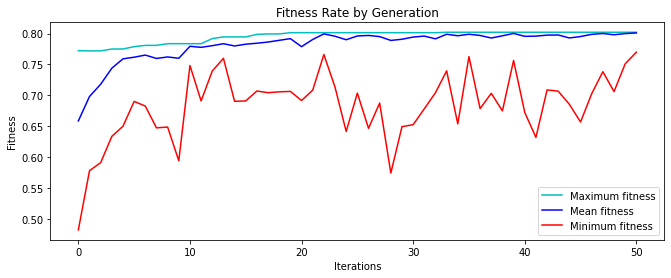

time: 9min 26s


In [ ]:
FeatureSelectionGA(KNeighborsClassifier(), 'KNN', X_pc2, y_pc2, cv_split=kfold, n_pop=50, n_gen=50)

#####PC4

######ORIGINAL

k-NN
AUC SKLEARN = 0.6449525983146068
AUC       =  0.8488038585395042
ACCURACY  =  0.8861738308927729
Recall    =  0.3321362229102167
Precision =  0.5496520146520146
Nilai G-Means = 0.5604754452418956
CONFISION MATRIX
TN : 1234
TP : 58
FP : 46
FN : 120
PERHITUNGAN MANUAL
ACCURACY =  0.8861454046639232
RECALL|SENSITIVITAS|TPrate =  0.3258426966292135
PRECISION =  0.5576923076923077
BALANCE =  0.5226219665744869
SPECIFICITY|TNrate =  0.9640625
FPrate =  0.0359375
AUC =  0.6449525983146068
G-MEANS =  0.5604754452418956


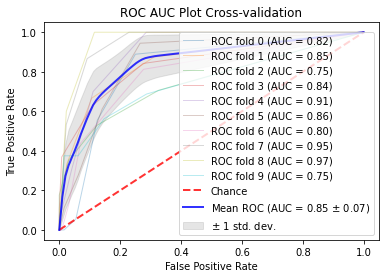

time: 1.09 s


In [ ]:
machinelearning(X_pc4, y_pc4, KNeighborsClassifier(), 'k-NN')

######OPTIMASI GA+B

The number of Features received by the system is : 37
The Shape of Training Data is : (1458, 37) and Target Data is : (1458,)
AUC For All the features : (0.7582162921348314, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg    	std      	min     	max     
0  	50    	0.75308	0.0351259	0.651124	0.825742
1  	33    	0.780184	0.0339297	0.667231	0.830894
2  	30    	0.805963	0.0175818	0.759445	0.84174 
3  	29    	0.820622	0.0149314	0.76785 	0.84174 
4  	29    	0.828229	0.0118466	0.790397	0.84174 
5  	27    	0.831769	0.00967863	0.802155	0.842912
6  	37    	0.836588	0.00809168	0.79289 	0.843302
7  	22    	0.839422	0.008288  	0.801707	0.843302
8  	34    	0.83899 	0.0101736 	0.794659	0.843302
9  	34    	0.837619	0.0108836 	0.795233	0.843302
10 	30    	0.839247	0.00857347	0.809652	0.843302
11 	29    	0.841166	0.00612002	0.809335	0.843302
12 	31    	0.838769	0.0101541 	0.801949	0.843302
13 	29    	0.

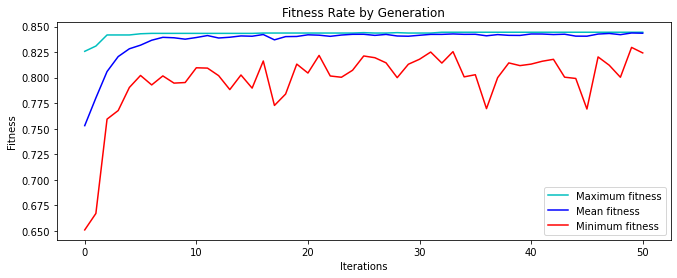

time: 13min 55s


In [ ]:
FeatureSelectionGA(KNeighborsClassifier(), 'KNN', X_pc4, y_pc4, cv_split=kfold, n_pop=50, n_gen=50)

####DECISION TREE

#####CM1

######ORIGINAL

Decision Tree
AUC SKLEARN = 0.5894050270442253
AUC       =  0.6238416599343047
ACCURACY  =  0.8349795918367346
Recall    =  0.35845238095238097
Precision =  0.325990675990676
Nilai G-Means = 0.5051437612556209
CONFISION MATRIX
TN : 401
TP : 14
FP : 48
FN : 35
PERHITUNGAN MANUAL
ACCURACY =  0.8333333333333334
RECALL|SENSITIVITAS|TPrate =  0.2857142857142857
PRECISION =  0.22580645161290322
BALANCE =  0.48929822970144154
SPECIFICITY|TNrate =  0.8930957683741648
FPrate =  0.10690423162583519
AUC =  0.5894050270442251
G-MEANS =  0.5051437612556208


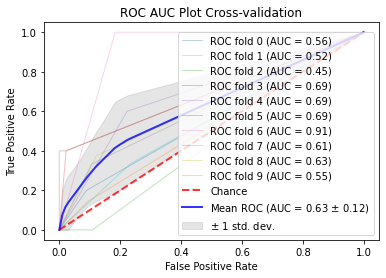

time: 689 ms


In [ ]:
machinelearning(X_cm1, y_cm1, DecisionTreeClassifier(), 'Decision Tree')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (498, 21) and Target Data is : (498,)
AUC For All the features : (0.64726603336212, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.646272	0.0329845	0.582701	0.716286
1  	25    	0.666556	0.0263575	0.613313	0.732239
2  	30    	0.691966	0.0274783	0.625744	0.732239
3  	24    	0.703677	0.0299213	0.608677	0.732239
4  	33    	0.711509	0.0236185	0.649311	0.732239
5  	26    	0.712915	0.0313621	0.618881	0.732239
6  	21    	0.720837	0.027636 	0.621108	0.732239
7  	36    	0.720362	0.0271374	0.62704 	0.732239
8  	39    	0.727137	0.0188025	0.637062	0.732239
9  	21    	0.7292  	0.0112607	0.68456 	0.732239
10 	19    	0.724373	0.0214682	0.64263 	0.732239
11 	25    	0.7229  	0.0245525	0.62704 	0.732239
12 	29    	0.725171	0.0238175	0.596246	0.732239
13 	33    	0.727883	0.0

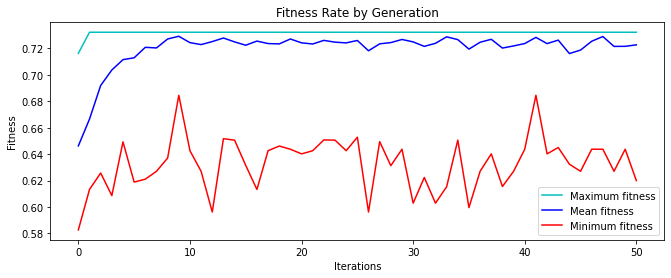

time: 8min 58s


In [ ]:
FeatureSelectionGA(DecisionTreeClassifier(), 'Decision Tree', X_cm1, y_cm1, cv_split=kfold, n_pop=50, n_gen=50)

#####JM1

######ORIGINAL

Decision Tree
AUC SKLEARN = 0.6052077006480269
AUC       =  0.5875798568818735
ACCURACY  =  0.7513786764705881
Recall    =  0.36003674980368194
Precision =  0.35871016577737425
Nilai G-Means = 0.5561940740283187
CONFISION MATRIX
TN : 7406
TP : 771
FP : 1371
FN : 1332
PERHITUNGAN MANUAL
ACCURACY =  0.7515625
RECALL|SENSITIVITAS|TPrate =  0.3666191155492154
PRECISION =  0.3599439775910364
BALANCE =  0.5387132425843217
SPECIFICITY|TNrate =  0.8437962857468383
FPrate =  0.15620371425316168
AUC =  0.6052077006480269
G-MEANS =  0.5561940740283188


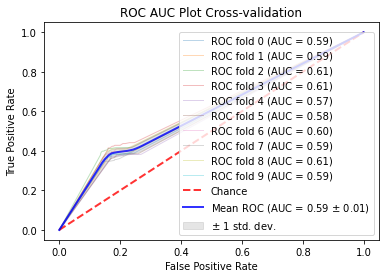

time: 4.66 s


In [ ]:
machinelearning(X_jm1, y_jm1, DecisionTreeClassifier(), 'Decision Tree')

######OPTIMASI GA+B

In [ ]:
FeatureSelectionGA(DecisionTreeClassifier(), 'Decision Tree', X_jm1, y_jm1, cv_split=kfold, n_pop=50, n_gen=50)

#####KC1

######ORIGINAL

Decision Tree
AUC SKLEARN = 0.652686930760523
AUC       =  0.6295787559219687
ACCURACY  =  0.8241029113067027
Recall    =  0.40058027822745795
Precision =  0.4235859774644988
Nilai G-Means = 0.6025581242863565
CONFISION MATRIX
TN : 1611
TP : 131
FP : 172
FN : 195
PERHITUNGAN MANUAL
ACCURACY =  0.8259838786154575
RECALL|SENSITIVITAS|TPrate =  0.401840490797546
PRECISION =  0.43234323432343236
BALANCE =  0.57157228788669
SPECIFICITY|TNrate =  0.9035333707234997
FPrate =  0.09646662927650028
AUC =  0.652686930760523
G-MEANS =  0.6025581242863565


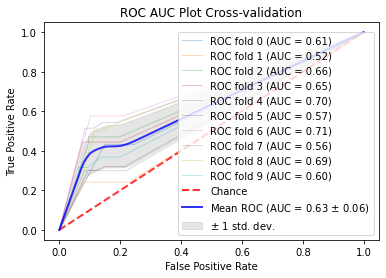

time: 943 ms


In [ ]:
machinelearning(X_kc1, y_kc1, DecisionTreeClassifier(), 'Decision Tree')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (2109, 21) and Target Data is : (2109,)
AUC For All the features : (0.7112547268166632, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std       	min     	max     
0  	50    	0.704535	0.00912709	0.688775	0.731605
1  	36    	0.708897	0.0106502 	0.677627	0.729694
2  	31    	0.712896	0.0096595 	0.686875	0.730387
3  	28    	0.71853 	0.00854852	0.697731	0.732481
4  	22    	0.720967	0.00814732	0.702333	0.732481
5  	30    	0.720897	0.00852179	0.698836	0.730387
6  	35    	0.724669	0.00765336	0.701062	0.733586
7  	34    	0.725916	0.00828944	0.703174	0.73469 
8  	32    	0.728849	0.00555621	0.703735	0.73469 
9  	28    	0.728651	0.00566849	0.7037  	0.73469 
10 	36    	0.72622 	0.0080099 	0.70738 	0.73568 
11 	30    	0.726307	0.00755487	0.707197	0.73568 
12 	25    	0.729159	0.00556095	0.709853	0.73568 
13 	3

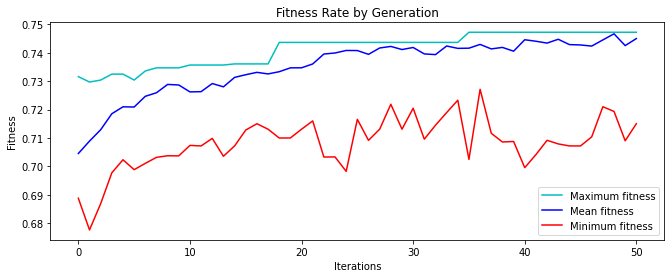

time: 16min 12s


In [ ]:
FeatureSelectionGA(DecisionTreeClassifier(), 'Decision Tree', X_kc1, y_kc1, cv_split=kfold, n_pop=50, n_gen=50)

#####KC2

######ORIGINAL

Decision Tree
AUC SKLEARN = 0.6780767931539241
AUC       =  0.6099400617106261
ACCURACY  =  0.787699564586357
Recall    =  0.4612873237873238
Precision =  0.46297979797979794
Nilai G-Means = 0.6474639360414377
CONFISION MATRIX
TN : 365
TP : 51
FP : 50
FN : 56
PERHITUNGAN MANUAL
ACCURACY =  0.7969348659003831
RECALL|SENSITIVITAS|TPrate =  0.4766355140186916
PRECISION =  0.504950495049505
BALANCE =  0.6202459479535471
SPECIFICITY|TNrate =  0.8795180722891566
FPrate =  0.12048192771084337
AUC =  0.6780767931539241
G-MEANS =  0.6474639360414377


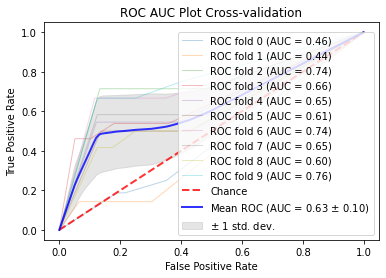

time: 534 ms


In [ ]:
machinelearning(X_kc2, y_kc2, DecisionTreeClassifier(), 'Decision Tree')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (522, 21) and Target Data is : (522,)
AUC For All the features : (0.7058551964868822, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.717508	0.0154521	0.691983	0.752877
1  	28    	0.728248	0.0139989	0.697568	0.753935
2  	33    	0.73396 	0.0133684	0.703592	0.7773  
3  	32    	0.737293	0.0175084	0.684608	0.7773  
4  	33    	0.741359	0.0138413	0.708118	0.7773  
5  	33    	0.749284	0.0124949	0.716552	0.77051 
6  	29    	0.750149	0.013627 	0.712791	0.7773  
7  	25    	0.75681 	0.0132522	0.717611	0.7773  
8  	24    	0.765486	0.00923869	0.721371	0.7773  
9  	32    	0.767274	0.0102025 	0.734951	0.7773  
10 	32    	0.771254	0.0126982 	0.715201	0.7773  
11 	24    	0.772472	0.0133203 	0.716552	0.7773  
12 	30    	0.773561	0.0104221 	0.737361	0.780914
13 	30    	0.775

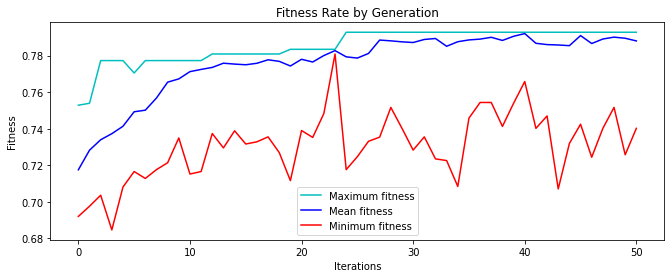

time: 9min 40s


In [ ]:
FeatureSelectionGA(DecisionTreeClassifier(), 'Decision Tree', X_kc2, y_kc2, cv_split=kfold, n_pop=50, n_gen=50)

#####PC1

######ORIGINAL

Decision Tree
AUC SKLEARN = 0.63714386388805
AUC       =  0.6398152907607424
ACCURACY  =  0.9070925470925472
Recall    =  0.3360822510822511
Precision =  0.3145310245310245
Nilai G-Means = 0.555261843901109
CONFISION MATRIX
TN : 980
TP : 25
FP : 52
FN : 52
PERHITUNGAN MANUAL
ACCURACY =  0.9062218214607755
RECALL|SENSITIVITAS|TPrate =  0.3246753246753247
PRECISION =  0.3246753246753247
BALANCE =  0.5211459893539281
SPECIFICITY|TNrate =  0.9496124031007752
FPrate =  0.050387596899224806
AUC =  0.6371438638880499
G-MEANS =  0.555261843901109


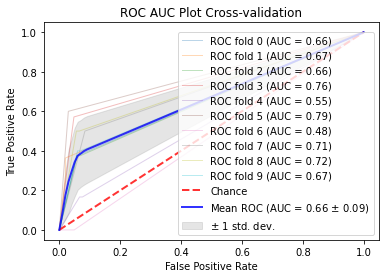

time: 678 ms


In [ ]:
machinelearning(X_pc1, y_pc1, DecisionTreeClassifier(), 'Decision Tree')

######OPTIMASI GA+B

The number of Features received by the system is : 21
The Shape of Training Data is : (1109, 21) and Target Data is : (1109,)
AUC For All the features : (0.7827255109231852, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std      	min     	max     
0  	50    	0.734993	0.0253458	0.683291	0.800557
1  	29    	0.753475	0.0264297	0.707811	0.800557
2  	23    	0.773607	0.0235089	0.715953	0.821491
3  	39    	0.782849	0.0199146	0.71411 	0.821491
4  	35    	0.790304	0.0198439	0.735427	0.821491
5  	37    	0.794256	0.0204581	0.708585	0.821491
6  	34    	0.798679	0.0242277	0.721182	0.821491
7  	34    	0.807194	0.0202414	0.737661	0.821491
8  	37    	0.815293	0.0221742	0.692785	0.821491
9  	30    	0.812947	0.0201653	0.730488	0.821491
10 	30    	0.817274	0.0123763	0.762956	0.821491
11 	30    	0.817535	0.01268  	0.759174	0.821491
12 	28    	0.814647	0.0179488	0.744929	0.821976
13 	32    	0.817347

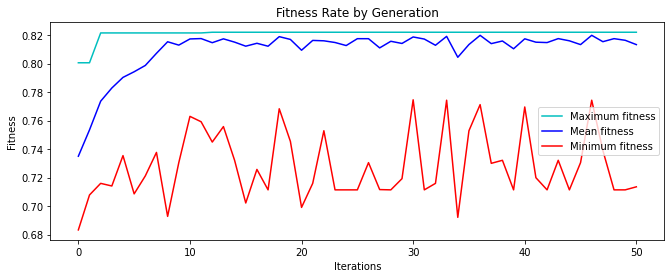

time: 11min 8s


In [ ]:
FeatureSelectionGA(DecisionTreeClassifier(), 'Decision Tree', X_pc1, y_pc1, cv_split=kfold, n_pop=50, n_gen=50)

#####PC2

######ORIGINAL

Decision Tree
AUC SKLEARN = 0.5216478052126201
AUC       =  0.5876802316014645
ACCURACY  =  0.9570630630630632
Recall    =  0.2
Precision =  0.06666666666666667
Nilai G-Means = 0.24758781402075813
CONFISION MATRIX
TN : 715
TP : 1
FP : 14
FN : 15
PERHITUNGAN MANUAL
ACCURACY =  0.9610738255033557
RECALL|SENSITIVITAS|TPrate =  0.0625
PRECISION =  0.06666666666666667
BALANCE =  0.33694832080035453
SPECIFICITY|TNrate =  0.9807956104252401
FPrate =  0.019204389574759947
AUC =  0.52164780521262
G-MEANS =  0.2475878140207581


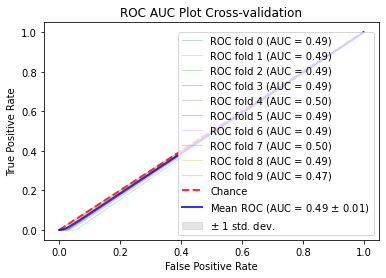

time: 590 ms


In [ ]:
machinelearning(X_pc2, y_pc2, DecisionTreeClassifier(), 'Decision Tree')

######OPTIMASI GA+B

The number of Features received by the system is : 36
The Shape of Training Data is : (745, 36) and Target Data is : (745,)
AUC For All the features : (0.7490997942386831, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg    	std      	min     	max     
0  	50    	0.75947	0.0432195	0.611754	0.812286
1  	30    	0.782968	0.0353936	0.666024	0.84285 
2  	30    	0.799701	0.0211143	0.732639	0.84285 
3  	26    	0.806361	0.0340045	0.637517	0.848337
4  	37    	0.812313	0.0261233	0.742927	0.848337
5  	28    	0.822319	0.0228684	0.768004	0.849709
6  	33    	0.826406	0.0245798	0.752529	0.849709
7  	32    	0.835182	0.0209437	0.751843	0.85108 
8  	28    	0.834514	0.0222112	0.774177	0.85108 
9  	27    	0.840159	0.0203396	0.751843	0.85108 
10 	32    	0.835976	0.0297748	0.695216	0.852452
11 	25    	0.843523	0.0127925	0.810228	0.852452
12 	24    	0.842457	0.0175876	0.783093	0.852452
13 	29    	0.841742	0.0

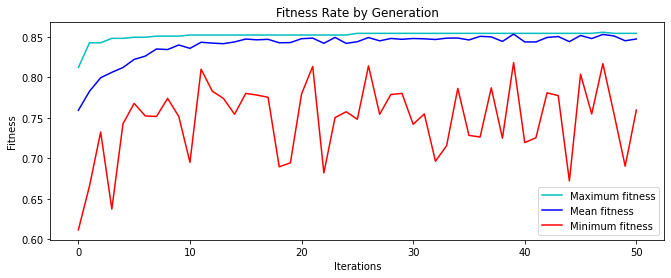

time: 9min 12s


In [ ]:
FeatureSelectionGA(DecisionTreeClassifier(), 'Decision Tree', X_pc2, y_pc2, cv_split=kfold, n_pop=50, n_gen=50)

#####PC4

######ORIGINAL

Decision Tree
AUC SKLEARN = 0.7228054775280899
AUC       =  0.7286421701780943
ACCURACY  =  0.8820170051960321
Recall    =  0.5184550223598211
Precision =  0.5266482996707456
Nilai G-Means = 0.6911483889192088
CONFISION MATRIX
TN : 1196
TP : 91
FP : 84
FN : 87
PERHITUNGAN MANUAL
ACCURACY =  0.8827160493827161
RECALL|SENSITIVITAS|TPrate =  0.5112359550561798
PRECISION =  0.52
BALANCE =  0.651290283864326
SPECIFICITY|TNrate =  0.934375
FPrate =  0.065625
AUC =  0.7228054775280899
G-MEANS =  0.6911483889192088


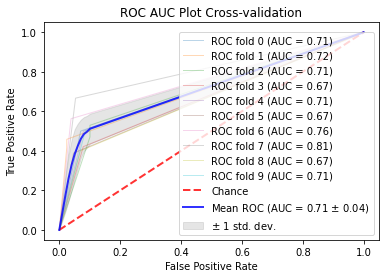

time: 852 ms


In [ ]:
machinelearning(X_pc4, y_pc4, DecisionTreeClassifier(), 'Decision Tree')

######OPTIMASI GA+B

The number of Features received by the system is : 37
The Shape of Training Data is : (1458, 37) and Target Data is : (1458,)
AUC + Bagging For All the features : (0.8597787921348313, 0)
__________________________________________________________________________ 

Feature Selection Optimization using Genetic Algorithm
gen	nevals	avg     	std    	min     	max     
0  	50    	0.818167	0.04541	0.736148	0.881004
1  	30    	0.849975	0.0279692	0.766731	0.881004
2  	30    	0.864503	0.00957916	0.834647	0.881004
3  	38    	0.865969	0.0101539 	0.838628	0.881004
4  	31    	0.868478	0.0113248 	0.835428	0.881004
5  	37    	0.87276 	0.0096785 	0.849083	0.884129
6  	27    	0.877398	0.00708012	0.85377 	0.882176
7  	26    	0.875582	0.0223202 	0.728336	0.882176
8  	29    	0.876982	0.00775603	0.849324	0.882251
9  	14    	0.880477	0.00375341	0.865713	0.882251
10 	34    	0.879893	0.00489224	0.8643  	0.883423
11 	38    	0.874519	0.0250473 	0.708581	0.883423
12 	35    	0.872814	0.0229707 	0.735516	0.883423
13

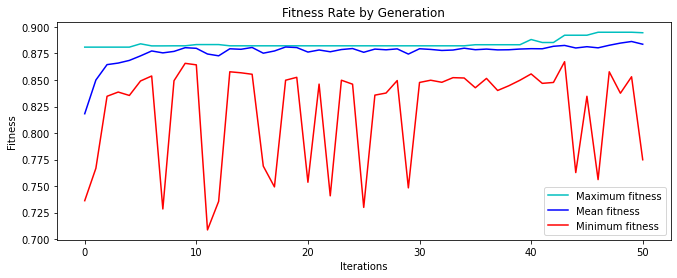

time: 13min 12s


In [ ]:
FeatureSelectionGA(DecisionTreeClassifier(), 'Decision Tree', X_pc4, y_pc4, cv_split=kfold, n_pop=50, n_gen=50)

###RESULT

In [ ]:
def result(wo, w, name, metric, pso):

    labels = ['CM1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC4']
    x = np.arange(len(labels))  # the label locations
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, wo, width, label=name +' '+pso)
    rects2 = ax.bar(x + width/2, w, width, label= name +' + GAB')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(metric)
    ax.set_xlabel('DATASET')
    ax.set_title(name)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(top=120)
    ax.legend(loc=(0.01,0.85))

    def autolabel(rects):
        for rect in rects:

            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(3, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    #plt.savefig('fig.png')

    plt.show()

   

time: 18.5 ms


In [ ]:
def result2(result, name, metric):

    labels = ['CM1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC4']
    x = np.arange(len(labels))  # the label locations
    width = 0.80  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, result, width, label=name)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(metric)
    ax.set_xlabel('DATASET')
    ax.set_title(name)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(top=120)
    ax.legend(loc=(0.01,0.85))

    def autolabel(rects):
        for rect in rects:

            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(3, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)

    fig.tight_layout()

    #plt.savefig('fig.png')

    plt.show()

   

time: 17.3 ms


####PERFORMANCE RESULT WITHOUT GA + **BAGGING**

#####AUC

In [ ]:
 #LOGISTIC REGRESSION
 auc_LR = np.round(np.multiply([0.5079769101404482, #CM1
                            0.5762234670318516, #KC1
                            0.6142664114401531, #KC2
                            0.51153352461492, #PC1
                            0.4993141289437586, #PC2
                            0.5839536516853933#PC4
                            ],100), 2)

#NAIVE BAYES
auc_NB = np.round(np.multiply([0.6166765147038771, #CM1
                            0.6402853810184118, #KC1
                            0.686037608377435, #KC2
                            0.6159204167925098, #PC1
                            0.520661865569273, #PC2
                            0.6842608848314606 #PC4
                            ],100), 2)

#SUPPORT VECTOR MACHINE
auc_SVM = np.round(np.multiply([0.49888641425389757, #CM1
                            0.5670210130441216, #KC1
                            0.6489471906316856, #KC2
                            0.537992046712977, #PC1
                            0.5, #PC2
                            0.5750614466292134 #PC4
                            ],100), 2)

#KNN
auc_KNN = np.round(np.multiply([0.5092723058042816, #CM1
                            0.6172680634072993, #KC1
                            0.7115189730886161, #KC2
                            0.5862591865498842, #PC1
                            0.5, #PC2
                            0.6449525983146068 #PC4
                            ],100), 2)

#DECISION TREE
auc_DT = np.round(np.multiply([0.5894050270442253, #CM1
                            0.652686930760523, #KC1
                            0.6780767931539241, #KC2
                            0.63714386388805, #PC1
                            0.5216478052126201, #PC2
                            0.7228054775280899 #PC4
                            ],100), 2)

time: 7.61 ms


In [ ]:
print('AUC LR',auc_LR)
print('AUC NB',auc_NB)
print('AUC SVM',auc_SVM)
print('AUC KNN',auc_KNN)
print('AUC DT',auc_DT)

AUC LR [50.8  57.62 61.43 51.15 49.93 58.4 ]
AUC NB [61.67 64.03 68.6  61.59 52.07 68.43]
AUC SVM [49.89 56.7  64.89 53.8  50.   57.51]
AUC KNN [50.93 61.73 71.15 58.63 50.   64.5 ]
AUC DT [58.94 65.27 67.81 63.71 52.16 72.28]
time: 8.71 ms


In [ ]:
table = {
    'Dataset' : ['CM1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC4'],
    'LR': [50.8  , 57.62, 61.43, 51.15, 49.93, 58.4 ],
    'NB' : [61.67, 64.03, 68.6 , 61.59, 52.07, 68.43],
    'SVM' : [49.89, 56.7 , 64.89, 53.8 , 50.  , 57.51],
    'KNN' : [50.93, 61.73, 71.15, 58.63, 50.  , 64.5 ],
    'DT' : [58.94, 65.27, 67.81, 63.71, 52.16, 72.28],
}

result = pd.DataFrame(data = table, columns = ['Dataset', 'LR', 'NB', 'SVM', 'KNN', 'DT'])
result

Dataset     LR     NB    SVM    KNN     DT
0     CM1  50.80  61.67  49.89  50.93  58.94
1     KC1  57.62  64.03  56.70  61.73  65.27
2     KC2  61.43  68.60  64.89  71.15  67.81
3     PC1  51.15  61.59  53.80  58.63  63.71
4     PC2  49.93  52.07  50.00  50.00  52.16
5     PC4  58.40  68.43  57.51  64.50  72.28

time: 47.2 ms


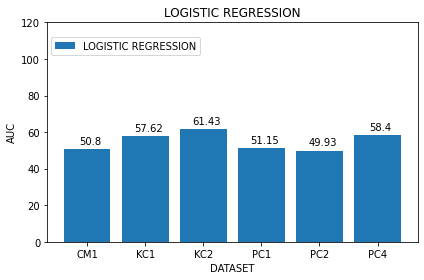

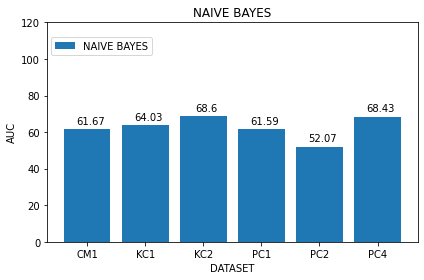

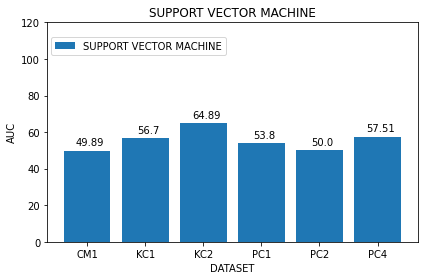

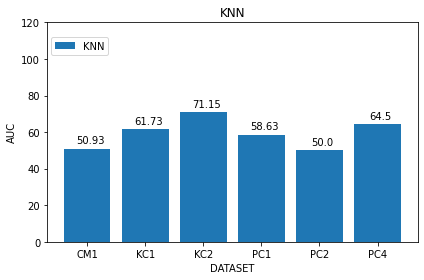

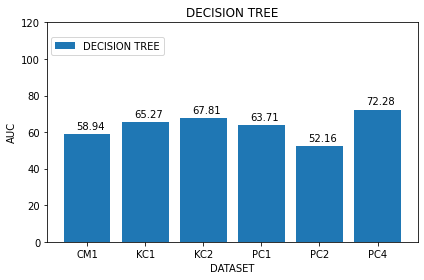

time: 1.05 s


In [ ]:
result2(auc_LR, 'LOGISTIC REGRESSION', 'AUC')
result2(auc_NB, 'NAIVE BAYES', 'AUC')
result2(auc_SVM, 'SUPPORT VECTOR MACHINE', 'AUC')
result2(auc_KNN, 'KNN', 'AUC')
result2(auc_DT, 'DECISION TREE', 'AUC')

#####G-MEANS

In [ ]:
 #LOGISTIC REGRESSION
 gmeans_LR = np.round(np.multiply([0.1425386204031757, #CM1
                            0.4073912225217405, #KC1
                            0.4893644207678754, #KC2
                            0.160930171455096, #PC1
                            0.0, #PC2
                            0.41601540863857334 #PC4
                            ],100), 2)

#NAIVE BAYES
gmeans_NB = np.round(np.multiply([0.5545552054052032, #CM1
                            0.5823929672082968, #KC1
                            0.6364310465190348, #KC2
                            0.5279488525788206, #PC1
                            0.3384382756017975, #PC2
                            0.6362954030068427 #PC4
                            ],100), 2)

#SUPPORT VECTOR MACHINE
gmeans_SVM = np.round(np.multiply([0.0, #CM1
                            0.3845283486700453, #KC1
                            0.5687504601437685, #KC2
                            0.27887464234519277, #PC1
                            0.0, #PC2
                            0.389163699272505 #PC4
                            ],100), 2)

#KNN
gmeans_KNN = np.round(np.multiply([0.1997680578620045, #CM1
                            0.5184158665431874, #KC1
                            0.6778792844510042, #KC2
                            0.43642136308993923, #PC1
                            0.0, #PC2
                            0.5604754452418956 #PC4
                            ],100), 2)

#DECISION TREE
gmeans_DT = np.round(np.multiply([0.5051437612556209, #CM1
                            0.6025581242863565, #KC1
                            0.6474639360414377, #KC2
                            0.555261843901109, #PC1
                            0.24758781402075813, #PC2
                            0.6911483889192088 #PC4
                            ],100), 2)

time: 17.3 ms


In [ ]:
print('G-MEANS LR',gmeans_LR)
print('G-MEANS NB',gmeans_NB)
print('G-MEANS SVM',gmeans_SVM)
print('G-MEANS KNN',gmeans_KNN)
print('G-MEANS DT',gmeans_DT)

G-MEANS LR [14.25 40.74 48.94 16.09  0.   41.6 ]
G-MEANS NB [55.46 58.24 63.64 52.79 33.84 63.63]
G-MEANS SVM [ 0.   38.45 56.88 27.89  0.   38.92]
G-MEANS KNN [19.98 51.84 67.79 43.64  0.   56.05]
G-MEANS DT [50.51 60.26 64.75 55.53 24.76 69.11]
time: 9.13 ms


In [ ]:
table = {
    'Dataset' : ['CM1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC4'],
    'LR': [14.25, 40.74, 48.94, 16.09, 0.  ,41.6 ],
    'NB' : [55.46, 58.24, 63.64, 52.79, 33.84, 63.63],
    'SVM' : [0.  ,38.45, 56.88, 27.89, 0.  ,38.92],
    'KNN' : [19.98, 51.84, 67.79, 43.64, 0.  ,56.05],
    'DT' : [50.51, 60.26, 64.75, 55.53, 24.76, 69.11],
}

result = pd.DataFrame(data = table, columns = ['Dataset', 'LR', 'NB', 'SVM', 'KNN', 'DT'])
result

Dataset     LR     NB    SVM    KNN     DT
0     CM1  14.25  55.46   0.00  19.98  50.51
1     KC1  40.74  58.24  38.45  51.84  60.26
2     KC2  48.94  63.64  56.88  67.79  64.75
3     PC1  16.09  52.79  27.89  43.64  55.53
4     PC2   0.00  33.84   0.00   0.00  24.76
5     PC4  41.60  63.63  38.92  56.05  69.11

time: 22.5 ms


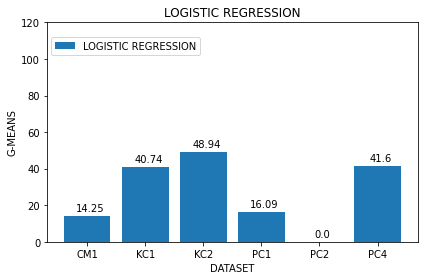

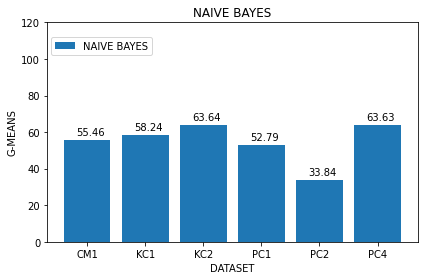

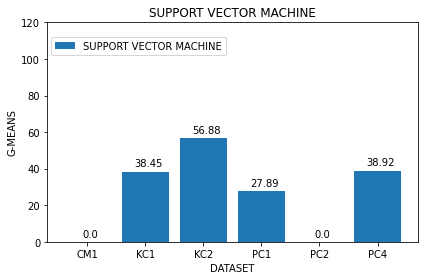

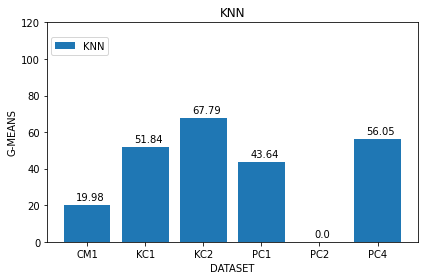

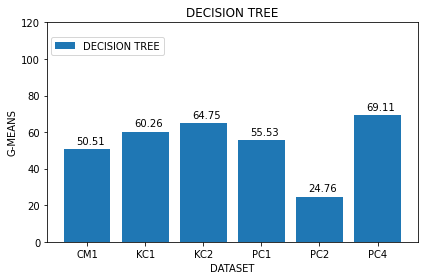

time: 1 s


In [ ]:
result2(gmeans_LR, 'LOGISTIC REGRESSION', 'G-MEANS')
result2(gmeans_NB, 'NAIVE BAYES', 'G-MEANS')
result2(gmeans_SVM, 'SUPPORT VECTOR MACHINE', 'G-MEANS')
result2(gmeans_KNN, 'KNN', 'G-MEANS')
result2(gmeans_DT, 'DECISION TREE', 'G-MEANS')

####PERFORMANCE RESULT WITH GA + BAGGING

#####AUC

In [ ]:
 #LOGISTIC REGRESSION
 auc_LRGA = np.round(np.multiply([0.677514658424617, #CM1
                            0.7171548606642834, #KC1
                            0.7926697443981534, #KC2
                            0.6746639987919056, #PC1
                            0.8058127572016461, #PC2
                            0.8003291783707864 #PC4
                            ],100), 2)

#NAIVE BAYES
auc_NBGA = np.round(np.multiply([0.6623108040543613, #CM1
                            0.7069511301349831, #KC1
                            0.7905528656682805, #KC2
                            0.650137169032518, #PC1
                            0.7202074759945131, #PC2
                            0.7908795646067415 #PC4
                            ],100), 2)

#SUPPORT VECTOR MACHINE
auc_SVMGA = np.round(np.multiply([0.7518976410163174, #CM1
                            0.7328638917657908, #KC1
                            0.8068348158991104, #KC2
                            0.7289464411557435, #PC1
                            0.8521519204389575, #PC2
                            0.8177405196629214 #PC4
                            ],100), 2)

#KNN
auc_KNNGA = np.round(np.multiply([0.7435343848006909, #CM1
                            0.7443785719938479, #KC1
                            0.8240288255827046, #KC2
                            0.8020235578375112, #PC1
                            0.8020833333333334, #PC2
                            0.8443995786516855 #PC4
                            ],100), 2)

#DECISION TREE
auc_DTGA = np.round(np.multiply([0.7322394436616516, #CM1
                            0.7472232640238929, #KC1
                            0.7928161243103253, #KC2
                            0.8219759891271519, #PC1
                            0.8558813443072704, #PC2
                            0.8950491573033709 #PC4
                            ],100), 2)

time: 7.95 ms


In [ ]:
print('AUC LRGA',auc_LRGA)
print('AUC NBGA',auc_NBGA)
print('AUC SVMGA',auc_SVMGA)
print('AUC KNNGA',auc_KNNGA)
print('AUC DTGA',auc_DTGA)

AUC LRGA [67.75 71.72 79.27 67.47 80.58 80.03]
AUC NBGA [66.23 70.7  79.06 65.01 72.02 79.09]
AUC SVMGA [75.19 73.29 80.68 72.89 85.22 81.77]
AUC KNNGA [74.35 74.44 82.4  80.2  80.21 84.44]
AUC DTGA [73.22 74.72 79.28 82.2  85.59 89.5 ]
time: 7.84 ms


In [ ]:
table = {
    'Dataset' : ['CM1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC4'],
    'LR + GAB': [67.75, 71.72, 79.27, 67.47, 80.58, 80.03],
    'NB + GAB' : [66.23, 70.7 , 79.06, 65.01, 72.02, 79.09],
    'SVM + GAB' : [75.19, 73.29, 80.68, 72.89, 85.22, 81.77],
    'KNN + GAB' : [74.35, 74.44, 82.4 , 80.2 , 80.21, 84.44],
    'DT + GAB' : [73.22, 74.72, 79.28, 82.2 , 85.59, 89.5 ],
}

result = pd.DataFrame(data = table, columns = ['Dataset', 'LR + GAB', 'NB + GAB', 'SVM + GAB', 'KNN + GAB', 'DT + GAB'])
result

Dataset  LR + GAB  NB + GAB  SVM + GAB  KNN + GAB  DT + GAB
0     CM1     67.75     66.23      75.19      74.35     73.22
1     KC1     71.72     70.70      73.29      74.44     74.72
2     KC2     79.27     79.06      80.68      82.40     79.28
3     PC1     67.47     65.01      72.89      80.20     82.20
4     PC2     80.58     72.02      85.22      80.21     85.59
5     PC4     80.03     79.09      81.77      84.44     89.50

time: 23.2 ms


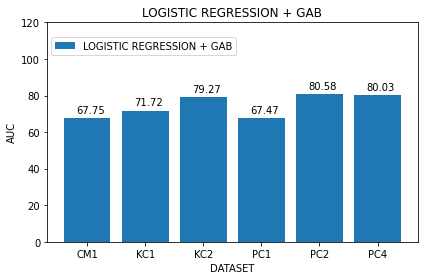

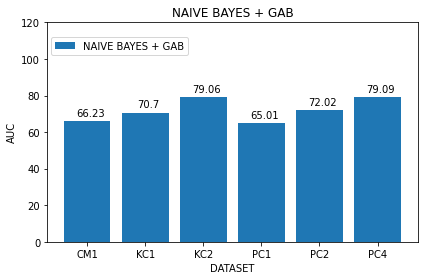

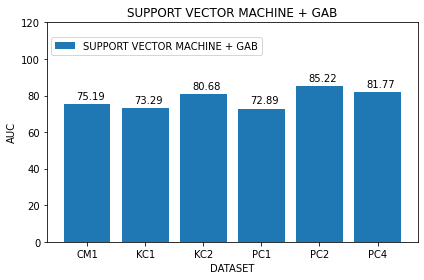

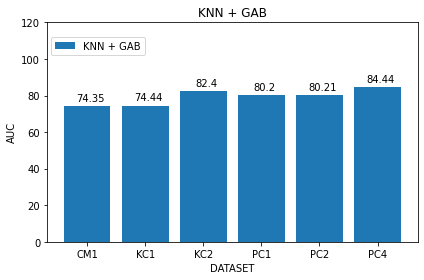

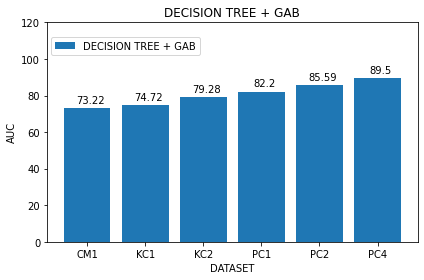

time: 939 ms


In [ ]:
result2(auc_LRGA, 'LOGISTIC REGRESSION + GAB', 'AUC')
result2(auc_NBGA, 'NAIVE BAYES + GAB', 'AUC')
result2(auc_SVMGA, 'SUPPORT VECTOR MACHINE + GAB', 'AUC')
result2(auc_KNNGA, 'KNN + GAB', 'AUC')
result2(auc_DTGA, 'DECISION TREE + GAB', 'AUC')

#####G-MEANS

In [ ]:
 #LOGISTIC REGRESSION
 gmeans_LRGA = np.round(np.multiply([0.6656014701238602, #CM1
                            0.7150750430175862, #KC1
                            0.7924880965526044, #KC2
                            0.6595086627412455, #PC1
                            0.8028370476646433, #PC2
                            0.7988893492942125 #PC4
                            ],100), 2)

#NAIVE BAYES
gmeans_NBGA = np.round(np.multiply([0.6335900080888863, #CM1
                            0.6990009351990184, #KC1
                            0.7898409116339825, #KC2
                            0.6063524918787178, #PC1
                            0.7027283689263065, #PC2
                            0.7891802566765656 #PC4
                            ],100), 2)

#SUPPORT VECTOR MACHINE
gmeans_SVMGA = np.round(np.multiply([0.7515267855714721, #CM1
                            0.7323336797478269, #KC1
                            0.8067388731822921, #KC2
                            0.7289445196689949, #PC1
                            0.8478670891260288, #PC2
                            0.8163639754726063 #PC4
                            ],100), 2)

#KNN
gmeans_KNNGA = np.round(np.multiply([0.7376700371906938, #CM1
                            0.7443083741087095, #KC1
                            0.8236045853474179, #KC2
                            0.7979133160447154, #PC1
                            0.7905694150420948, #PC2
                            0.8363557082883556 #PC4
                            ],100), 2)

#DECISION TREE
gmeans_DTGA = np.round(np.multiply([0.7312338668626521, #CM1
                            0.7450430418821968, #KC1
                            0.7923744211454998, #KC2
                            0.8214367785494694, #PC1
                            0.8556677816405868, #PC2
                            0.8946627008625132 #PC4
                            ],100), 2)

time: 7.84 ms


In [ ]:
print('G-MEANS LRGA',gmeans_LRGA)
print('G-MEANS NBGA',gmeans_NBGA)
print('G-MEANS SVMGA',gmeans_SVMGA)
print('G-MEANS KNNGA',gmeans_KNNGA)
print('G-MEANS DTGA',gmeans_DTGA)

G-MEANS LRGA [66.56 71.51 79.25 65.95 80.28 79.89]
G-MEANS NBGA [63.36 69.9  78.98 60.64 70.27 78.92]
G-MEANS SVMGA [75.15 73.23 80.67 72.89 84.79 81.64]
G-MEANS KNNGA [73.77 74.43 82.36 79.79 79.06 83.64]
G-MEANS DTGA [73.12 74.5  79.24 82.14 85.57 89.47]
time: 7.88 ms


In [ ]:
table = {
    'Dataset' : ['CM1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC4'],
    'LR + GAB': [66.56, 71.51, 79.25, 65.95, 80.28, 79.89],
    'NB + GAB' : [63.36, 69.9 , 78.98, 60.64, 70.27, 78.92],
    'SVM + GAB' : [75.15, 73.23, 80.67, 72.89, 84.79, 81.64],
    'KNN + GAB' : [73.77, 74.43, 82.36, 79.79, 79.06, 83.64],
    'DT + GAB' : [73.12, 74.5 , 79.24, 82.14, 85.57, 89.47],
}

result = pd.DataFrame(data = table, columns = ['Dataset', 'LR + GAB', 'NB + GAB', 'SVM + GAB', 'KNN + GAB', 'DT + GAB'])
result

Dataset  LR + GAB  NB + GAB  SVM + GAB  KNN + GAB  DT + GAB
0     CM1     66.56     63.36      75.15      73.77     73.12
1     KC1     71.51     69.90      73.23      74.43     74.50
2     KC2     79.25     78.98      80.67      82.36     79.24
3     PC1     65.95     60.64      72.89      79.79     82.14
4     PC2     80.28     70.27      84.79      79.06     85.57
5     PC4     79.89     78.92      81.64      83.64     89.47

time: 22.9 ms


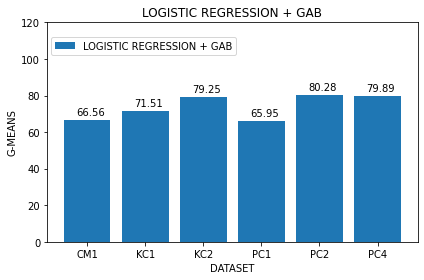

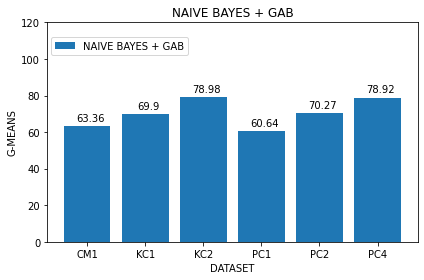

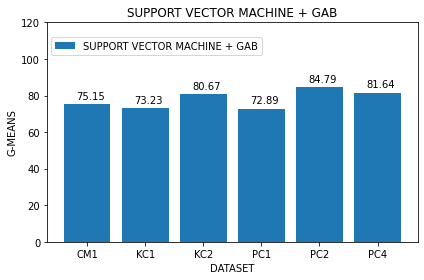

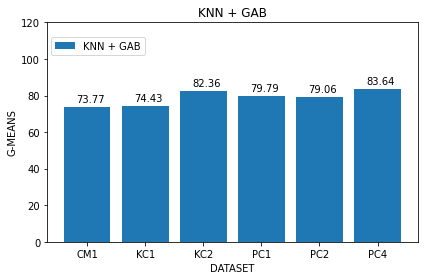

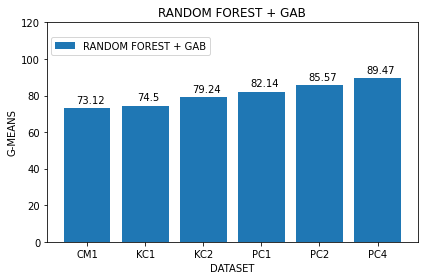

time: 1.04 s


In [ ]:
result2(gmeans_LRGA, 'LOGISTIC REGRESSION + GAB', 'G-MEANS')
result2(gmeans_NBGA, 'NAIVE BAYES + GAB', 'G-MEANS')
result2(gmeans_SVMGA, 'SUPPORT VECTOR MACHINE + GAB', 'G-MEANS')
result2(gmeans_KNNGA, 'KNN + GAB', 'G-MEANS')
result2(gmeans_DTGA, 'RANDOM FOREST + GAB', 'G-MEANS')

####COMPARISON RESULT WITH GA+B AND WITHOUT GA+B

#####AUC

In [ ]:
table = {
    'Dataset' : ['CM1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC4'],
    'LR': [50.8  , 57.62, 61.43, 51.15, 49.93, 58.4 ],
    'LR + GAB': [67.75, 71.72, 79.27, 67.47, 80.58, 80.03],
    'NB' : [61.67, 64.03, 68.6 , 61.59, 52.07, 68.43],
    'NB + GAB' : [66.23, 70.7 , 79.06, 65.01, 72.02, 79.09],
    'SVM' : [49.89, 56.7 , 64.89, 53.8 , 50.  , 57.51],
    'SVM + GAB' : [75.19, 73.29, 80.68, 72.89, 85.22, 81.77],
    'KNN' : [50.93, 61.73, 71.15, 58.63, 50.  , 64.5 ],
    'KNN + GAB' : [74.35, 74.44, 82.4 , 80.2 , 80.21, 84.44],
    'DT' : [58.94, 65.27, 67.81, 63.71, 52.16, 72.28],
    'DT + GAB' : [73.22, 74.72, 79.28, 82.2 , 85.59, 89.5 ],
}

result = pd.DataFrame(data = table, columns = ['Dataset', 'LR', 'LR + GAB', 'NB', 'NB + GAB', 'SVM', 'SVM + GAB', 'KNN', 'KNN + GAB', 'DT', 'DT + GAB'])
result

Dataset     LR  LR + GAB     NB  ...    KNN  KNN + GAB     DT  DT + GAB
0     CM1  50.80     67.75  61.67  ...  50.93      74.35  58.94     73.22
1     KC1  57.62     71.72  64.03  ...  61.73      74.44  65.27     74.72
2     KC2  61.43     79.27  68.60  ...  71.15      82.40  67.81     79.28
3     PC1  51.15     67.47  61.59  ...  58.63      80.20  63.71     82.20
4     PC2  49.93     80.58  52.07  ...  50.00      80.21  52.16     85.59
5     PC4  58.40     80.03  68.43  ...  64.50      84.44  72.28     89.50

[6 rows x 11 columns]

time: 37.2 ms


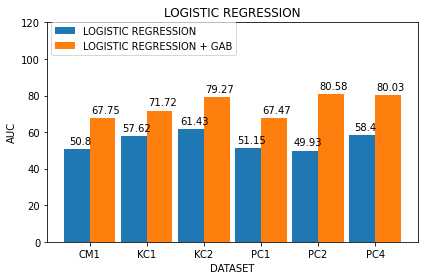

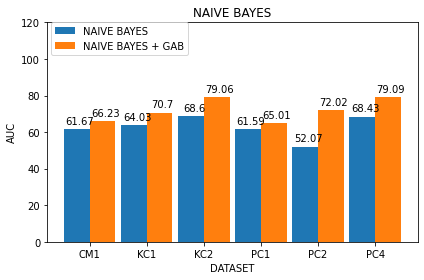

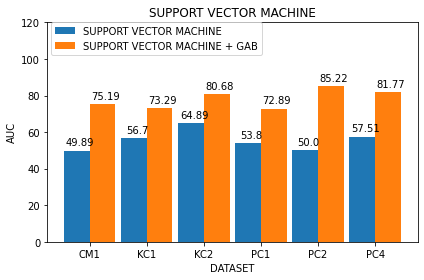

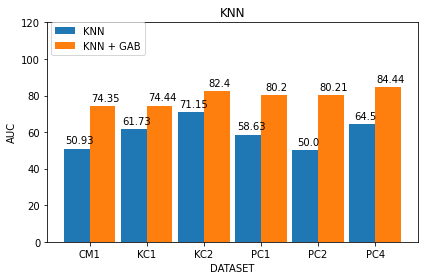

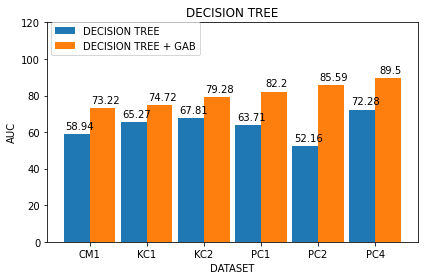

time: 1.11 s


In [ ]:
result(auc_LR, auc_LRGA, 'LOGISTIC REGRESSION', 'AUC', '')
result(auc_NB, auc_NBGA, 'NAIVE BAYES', 'AUC', '')
result(auc_SVM, auc_SVMGA, 'SUPPORT VECTOR MACHINE', 'AUC', '')
result(auc_KNN, auc_KNNGA, 'KNN', 'AUC', '')
result(auc_DT, auc_DTGA, 'DECISION TREE', 'AUC', '')

#####G-MEANS

In [ ]:
table = {
    'Dataset' : ['CM1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC4'],
    'LR': [14.25, 40.74, 48.94, 16.09, 0.  ,41.6 ],
    'LR + GAB': [66.56, 71.51, 79.25, 65.95, 80.28, 79.89],
    'NB' : [55.46, 58.24, 63.64, 52.79, 33.84, 63.63],
    'NB + GAB' : [63.36, 69.9 , 78.98, 60.64, 70.27, 78.92],
    'SVM' : [0.  ,38.45, 56.88, 27.89, 0.  ,38.92],
    'SVM + GAB' : [75.15, 73.23, 80.67, 72.89, 84.79, 81.64],
    'KNN' : [19.98, 51.84, 67.79, 43.64, 0.  ,56.05],
    'KNN + GAB' : [73.77, 74.43, 82.36, 79.79, 79.06, 83.64],
    'DT' : [50.51, 60.26, 64.75, 55.53, 24.76, 69.11],
    'DT + GAB' : [73.12, 74.5 , 79.24, 82.14, 85.57, 89.47],
}

result = pd.DataFrame(data = table, columns = ['Dataset', 'LR', 'LR + GAB', 'NB', 'NB + GAB', 'SVM', 'SVM + GAB', 'KNN', 'KNN + GAB', 'DT', 'DT + GAB'])
result

Dataset     LR  LR + GAB     NB  ...    KNN  KNN + GAB     DT  DT + GAB
0     CM1  14.25     66.56  55.46  ...  19.98      73.77  50.51     73.12
1     KC1  40.74     71.51  58.24  ...  51.84      74.43  60.26     74.50
2     KC2  48.94     79.25  63.64  ...  67.79      82.36  64.75     79.24
3     PC1  16.09     65.95  52.79  ...  43.64      79.79  55.53     82.14
4     PC2   0.00     80.28  33.84  ...   0.00      79.06  24.76     85.57
5     PC4  41.60     79.89  63.63  ...  56.05      83.64  69.11     89.47

[6 rows x 11 columns]

time: 48.8 ms


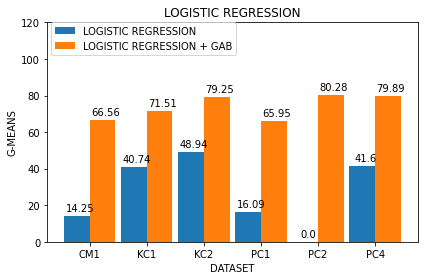

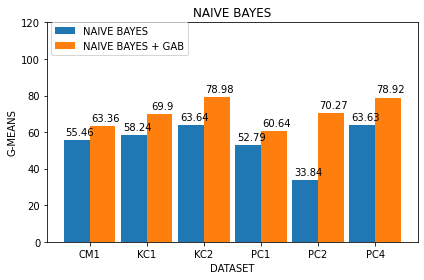

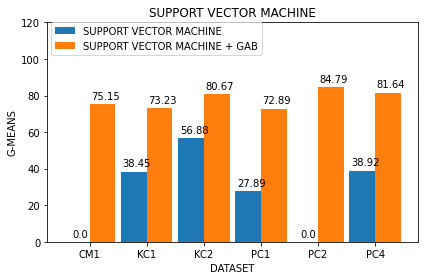

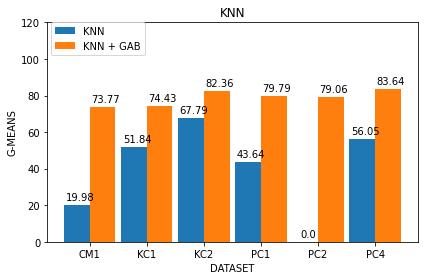

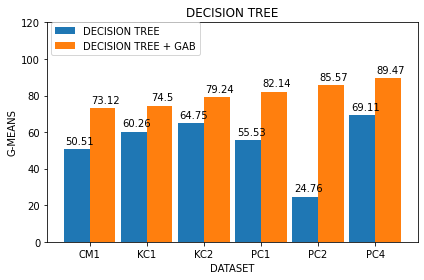

time: 1.16 s


In [ ]:
result(gmeans_LR, gmeans_LRGA, 'LOGISTIC REGRESSION', 'G-MEANS', '')
result(gmeans_NB, gmeans_NBGA, 'NAIVE BAYES', 'G-MEANS', '')
result(gmeans_SVM, gmeans_SVMGA, 'SUPPORT VECTOR MACHINE', 'G-MEANS', '')
result(gmeans_KNN, gmeans_KNNGA, 'KNN', 'G-MEANS', '')
result(gmeans_DT, gmeans_DTGA, 'DECISION TREE', 'G-MEANS', '')

####COMPARISON RESULT WITH GA AND PSO

In [ ]:
 #LOGISTIC REGRESSION
 auc_LRPSO = np.round(np.multiply([0.6561747193309395, #CM1
                            0.7032651593612476, #KC1
                            0.7818263709041775, #KC2
                            0.632405869324474, #PC1
                            0.6392746913580247, #PC2
                            0.7903397120786517 #PC4
                            ],100), 2)

#NAIVE BAYES
auc_NBPSO = np.round(np.multiply([0.6189036861960819, #CM1
                            0.647095609866875, #KC1
                            0.7184551289269226, #KC2
                            0.6158260344306856, #PC1
                            0.661522633744856, #PC2
                            0.69375 #PC4
                            ],100), 2)

#SUPPORT VECTOR MACHINE
auc_SVMPSO = np.round(np.multiply([0.6133130312258533, #CM1
                            0.7210059904551851, #KC1
                            0.7712757572345457, #KC2
                            0.6293038356991846, #PC1
                            0.6087105624142661, #PC2
                            0.7544592696629213 #PC4
                            ],100), 2)

#KNN
auc_KNNPSO = np.round(np.multiply([0.671174037543748, #CM1
                            0.7260424802755403, #KC1
                            0.7641932214840671, #KC2
                            0.7822535991140642, #PC1
                            0.7155778463648834, #PC2
                            0.7381627457865169 #PC4
                            ],100), 2)

#DECISION TREE
auc_DTPSO = np.round(np.multiply([0.6981046316076542, #CM1
                            0.700238104249748, #KC1
                            0.7069136358518184, #KC2
                            0.7218614718614719, #PC1
                            0.7518432784636488, #PC2
                            0.8577510533707865 #PC4
                            ],100), 2)

time: 9.74 ms


In [ ]:
 #LOGISTIC REGRESSION
 gmeans_LRPSO = np.round(np.multiply([0.6440491652842231, #CM1
                            0.7022581759330024, #KC1
                            0.7818023748179767, #KC2
                            0.5986557477540301, #PC1
                            0.6346477588219923, #PC2
                            0.7892692360445148 #PC4
                            ],100), 2)

#NAIVE BAYES
gmeans_NBPSO = np.round(np.multiply([0.5559468141312807, #CM1
                            0.5962681877863326, #KC1
                            0.6887550474369613, #KC2
                            0.5426536362096669, #PC1
                            0.6415002990995842, #PC2
                            0.6661456297237114 #PC4
                            ],100), 2)

#SUPPORT VECTOR MACHINE
gmeans_SVMPSO = np.round(np.multiply([0.5961865388987988, #CM1
                            0.720774784886704, #KC1
                            0.7711438018958215, #KC2
                            0.5919014504894486, #PC1
                            0.5989245047702307, #PC2
                            0.746292333600588 #PC4
                            ],100), 2)

#KNN
gmeans_KNNPSO = np.round(np.multiply([0.6697880052682883, #CM1
                            0.7253016179425733, #KC1
                            0.7640144303409263, #KC2
                            0.7786605758344286, #PC1
                            0.7089836037193918, #PC2
                            0.7341938128146279 #PC4
                            ],100), 2)

#DECISION TREE
gmeans_DTPSO = np.round(np.multiply([0.6928045776478907, #CM1
                            0.6922988549498883, #KC1
                            0.7032986444054973, #KC2
                            0.7132026420716686, #PC1
                            0.7490849470437363, #PC2
                            0.8576991448251 #PC4
                            ],100), 2)

time: 9.44 ms


In [ ]:
print('AUC LRPSO',auc_LRPSO)
print('AUC NBPSO',auc_NBPSO)
print('AUC SVMPSO',auc_SVMPSO)
print('AUC KNNPSO',auc_KNNPSO)
print('AUC DTPSO',auc_DTPSO)

AUC LRPSO [65.62 70.33 78.18 63.24 63.93 79.03]
AUC NBPSO [61.89 64.71 71.85 61.58 66.15 69.38]
AUC SVMPSO [61.33 72.1  77.13 62.93 60.87 75.45]
AUC KNNPSO [67.12 72.6  76.42 78.23 71.56 73.82]
AUC DTPSO [69.81 70.02 70.69 72.19 75.18 85.78]
time: 7.59 ms


In [ ]:
print('G-MEANS LRPSO',gmeans_LRPSO)
print('G-MEANS NBPSO',gmeans_NBPSO)
print('G-MEANS SVMPSO',gmeans_SVMPSO)
print('G-MEANS KNNPSO',gmeans_KNNPSO)
print('G-MEANS DTPSO',gmeans_DTPSO)

G-MEANS LRPSO [64.4  70.23 78.18 59.87 63.46 78.93]
G-MEANS NBPSO [55.59 59.63 68.88 54.27 64.15 66.61]
G-MEANS SVMPSO [59.62 72.08 77.11 59.19 59.89 74.63]
G-MEANS KNNPSO [66.98 72.53 76.4  77.87 70.9  73.42]
G-MEANS DTPSO [69.28 69.23 70.33 71.32 74.91 85.77]
time: 3.41 ms


#####AUC

In [ ]:
table = {
    'Dataset' : ['CM1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC4'],
    'LR + PSOB': [65.62, 70.33, 78.18, 63.24, 63.93, 79.03],
    'LR + GAB': [67.75, 71.72, 79.27, 67.47, 80.58, 80.03],
    'NB + PSOB' : [61.89, 64.71, 71.85, 61.58, 66.15, 69.38],
    'NB + GAB' : [66.23, 70.7 , 79.06, 65.01, 72.02, 79.09],
    'SVM + PSOB' : [61.33, 72.1 , 77.13, 62.93, 60.87, 75.45],
    'SVM + GAB' : [75.19, 73.29, 80.68, 72.89, 85.22, 81.77],
    'KNN + PSOB' : [67.12, 72.6 , 76.42, 78.23, 71.56, 73.82],
    'KNN + GAB' : [74.35, 74.44, 82.4 , 80.2 , 80.21, 84.44],
    'DT + PSOB' : [69.81, 70.02, 70.69, 72.19, 75.18, 85.78],
    'DT + GAB' : [73.22, 74.72, 79.28, 82.2 , 85.59, 89.5 ],
}

result = pd.DataFrame(data = table, columns = ['Dataset', 'LR + PSOB', 'LR + GAB', 'NB + PSOB', 'NB + GAB', 'SVM + PSOB', 'SVM + GAB', 'KNN + PSOB', 'KNN + GAB', 'DT + PSOB', 'DT + GAB'])
result

Dataset  LR + PSOB  LR + GAB  ...  KNN + GAB  DT + PSOB  DT + GAB
0     CM1      65.62     67.75  ...      74.35      69.81     73.22
1     KC1      70.33     71.72  ...      74.44      70.02     74.72
2     KC2      78.18     79.27  ...      82.40      70.69     79.28
3     PC1      63.24     67.47  ...      80.20      72.19     82.20
4     PC2      63.93     80.58  ...      80.21      75.18     85.59
5     PC4      79.03     80.03  ...      84.44      85.78     89.50

[6 rows x 11 columns]

time: 65.5 ms


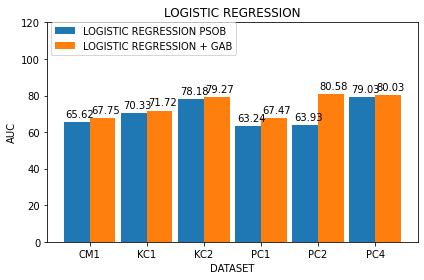

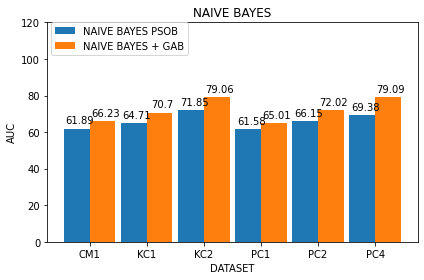

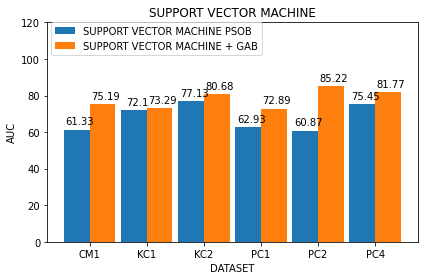

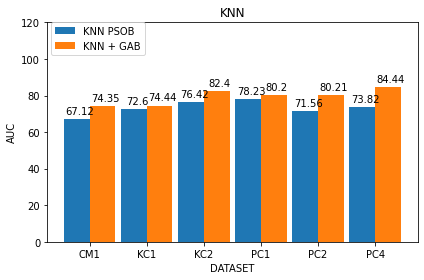

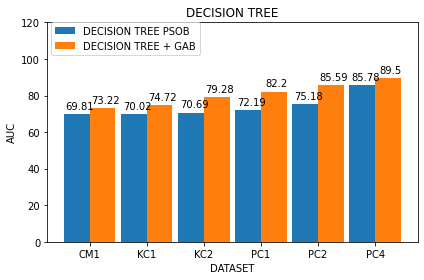

time: 1.27 s


In [ ]:
result(auc_LRPSO, auc_LRGA, 'LOGISTIC REGRESSION', 'AUC', 'PSOB')
result(auc_NBPSO, auc_NBGA, 'NAIVE BAYES', 'AUC', 'PSOB')
result(auc_SVMPSO, auc_SVMGA, 'SUPPORT VECTOR MACHINE', 'AUC', 'PSOB')
result(auc_KNNPSO, auc_KNNGA, 'KNN', 'AUC', 'PSOB')
result(auc_DTPSO, auc_DTGA, 'DECISION TREE', 'AUC', 'PSOB')

#####G-MEANS

In [ ]:
table = {
    'Dataset' : ['CM1', 'KC1', 'KC2', 'PC1', 'PC2', 'PC4'],
    'LR + PSOB': [64.4 , 70.23, 78.18, 59.87, 63.46, 78.93],
    'LR + GAB': [66.56, 71.51, 79.25, 65.95, 80.28, 79.89],
    'NB + PSOB' : [55.59, 59.63, 68.88, 54.27, 64.15, 66.61],
    'NB + GAB' : [63.36, 69.9 , 78.98, 60.64, 70.27, 78.92],
    'SVM + PSOB' : [59.62, 72.08, 77.11, 59.19, 59.89, 74.63],
    'SVM + GAB' : [75.15, 73.23, 80.67, 72.89, 84.79, 81.64],
    'KNN + PSOB' : [66.98, 72.53, 76.4 , 77.87, 70.9 , 73.42],
    'KNN + GAB' : [73.77, 74.43, 82.36, 79.79, 79.06, 83.64],
    'DT + PSOB' : [69.28, 69.23, 70.33, 71.32, 74.91, 85.77],
    'DT + GAB' : [73.12, 74.5 , 79.24, 82.14, 85.57, 89.47],
}

result = pd.DataFrame(data = table, columns = ['Dataset', 'LR + PSOB', 'LR + GAB', 'NB + PSOB', 'NB + GAB', 'SVM + PSOB', 'SVM + GAB', 'KNN + PSOB', 'KNN + GAB', 'DT + PSOB', 'DT + GAB'])
result

Dataset  LR + PSOB  LR + GAB  ...  KNN + GAB  DT + PSOB  DT + GAB
0     CM1      64.40     66.56  ...      73.77      69.28     73.12
1     KC1      70.23     71.51  ...      74.43      69.23     74.50
2     KC2      78.18     79.25  ...      82.36      70.33     79.24
3     PC1      59.87     65.95  ...      79.79      71.32     82.14
4     PC2      63.46     80.28  ...      79.06      74.91     85.57
5     PC4      78.93     79.89  ...      83.64      85.77     89.47

[6 rows x 11 columns]

time: 46.1 ms


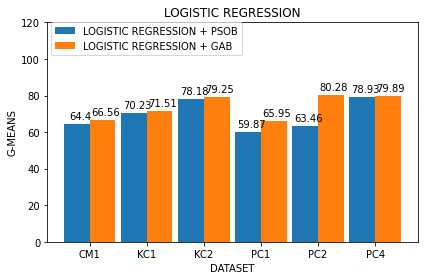

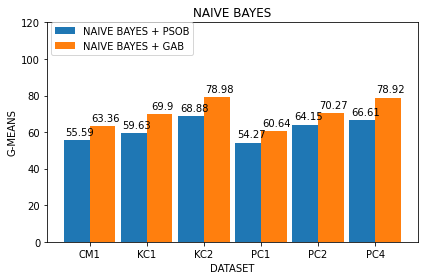

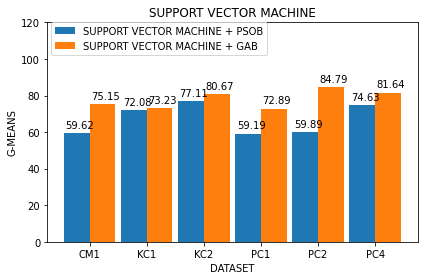

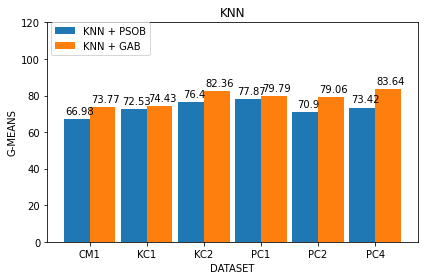

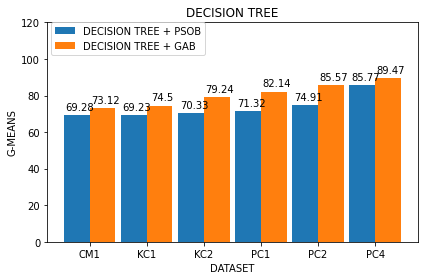

time: 1.2 s


In [ ]:
result(gmeans_LRPSO, gmeans_LRGA, 'LOGISTIC REGRESSION', 'G-MEANS', '+ PSOB')
result(gmeans_NBPSO, gmeans_NBGA, 'NAIVE BAYES', 'G-MEANS', '+ PSOB')
result(gmeans_SVMPSO, gmeans_SVMGA, 'SUPPORT VECTOR MACHINE', 'G-MEANS', '+ PSOB')
result(gmeans_KNNPSO, gmeans_KNNGA, 'KNN', 'G-MEANS', '+ PSOB')
result(gmeans_DTPSO, gmeans_DTGA, 'DECISION TREE', 'G-MEANS', '+ PSOB')